### **Problem Statement**
The aim of this project is to develop a predictive machine learning model that can accurately predict customer churn for a subscription-based service. The model will utilize a variety of factors including demographic details, service usage patterns, subscription characteristics, and billing information to estimate the likelihood of churn. This predictive capability is crucial for identifying at-risk customers and implementing timely interventions to improve customer retention.

Utilizing historical data on customer interactions, service subscriptions, and churn incidents, the model will classify customers into likely to churn or not. This will enable the service provider to tailor specific retention strategies, such as personalized offers or improved service features, to targeted customer segments. The ultimate goal is to enhance customer satisfaction and loyalty, thereby reducing churn and increasing the profitability of the business.

The predictive model will be integrated into a customer relationship management (CRM) system, providing real-time insights into customer behavior and churn risk. This integration will facilitate proactive engagement and personalized communication with customers, significantly enhancing the effectiveness of retention strategies.

Data Description:
The dataset includes the following features:
*   CustomerID: Unique identifier for the customer.
*   Demographics: Gender, age (SeniorCitizen), partnership status (Partner), and dependents information.
*   Service Subscription Details: Tenure of the subscription, phone service status, multiple lines, internet service type, and security features.
*   Service Utilization: Usage of additional services such as online security, tech support, streaming TV, and streaming movies.
*   Contract and Billing: Type of contract, billing methods, paperless billing status, monthly charges, and total charges.
*   Churn: Customer churn status, indicating whether the customer has left within the last month.

In [1]:
!pip install --upgrade matplotlib
!pip install --upgrade seaborn
!pip install -U scikit-learn


!pip install xgboost
!pip install lightgbm
!pip install catboost

!pip install inflection
!pip install dython

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.6/8.6 MB 64.4 MB/s eta 0:00:00
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.8.0
    Uninstalling matplotlib-3.8.0:
      Successfully uninstalled matplotlib-3.8.0
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.7/98.7 MB 8.2 MB/s eta 0:00:00


### **Import Libraries**

In [2]:
#import required libraries
from google.colab import drive
import gspread
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder

# scaling
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from google.colab import auth
from google.auth import default

# visuals
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

plt.style.use('fivethirtyeight')
sns.set_style('white')
sns.set_context('notebook', font_scale=1.5, rc={'lines.linewidth':1.5})
# change the maximum width in characters of a column (default: 50)
pd.set_option('display.max_colwidth', None)
# change the display precision for better viz
pd.set_option('display.precision', 3)


# model
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import RidgeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from xgboost import XGBRFClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.ensemble import StackingClassifier

# metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import make_scorer

# model evaluation & tuning hyperparameter
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate
from sklearn.feature_selection import SelectKBest, RFE, SelectFromModel
from sklearn.feature_selection import chi2, f_classif, mutual_info_classif

# explainable AI
import shap

import pickle
import joblib
from google.colab import files
from imblearn.over_sampling import SMOTE
import json
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.feature_selection import RFE
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import validation_curve
# association between attributes
from dython.nominal import associations
# CamelCase to snake_case format
import inflection

import matplotlib.patches as mpatches
from matplotlib.colors import LinearSegmentedColormap
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


### **Data Aquisition and Prepration**

In [3]:
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Define the path to your CSV file
csv_path = '/content/drive/MyDrive/Telco-Churn-Analysis.csv'

# Read the CSV file into a DataFrame
df = pd.read_csv(csv_path)

# Display the first few rows of the DataFrame
df.head()

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  0390-DCFDQ  Female              1     Yes         No       1          Yes   
1  5940-AHUHD    Male              0      No         No       1          Yes   
2  5583-SXDAG    Male              0     Yes         No       1          Yes   
3  4110-PFEUZ  Female              0      No         No       1          Yes   
4  8040-MNRTF  Female              0      No         No       1          Yes   

  MultipleLines InternetService OnlineSecurity  ... TechSupport StreamingTV  \
0            No     Fiber optic             No  ...          No          No   
1            No     Fiber optic             No  ...          No          No   
2            No     Fiber optic             No  ...          No          No   
3            No     Fiber optic             No  ...          No          No   
4            No     Fiber optic             No  ...          No          No   

  StreamingMovies Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
0              No  Monthly              Yes      Mailed check          70.45   
1              No  Monthly               No      Mailed check          70.60   
2              No  Monthly               No  Electronic check          70.00   
3              No  Monthly               No      Mailed check          69.55   
4              No  Monthly               No      Mailed check          71.10   

  TotalCharges  Churn  Tenure_Bin  
0        70.45    Yes        0-20  
1        70.60    Yes        0-20  
2        70.00    Yes        0-20  
3        69.55    Yes        0-20  
4        71.10     No        0-20  

[5 rows x 22 columns]

## Overview and Clean the Dataset

In [5]:
print("No. of rows: {}".format(df.shape[0]))
print("No. of cols: {}".format(df.shape[1]))

No. of rows: 7043
No. of cols: 22


In [6]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn',
       'Tenure_Bin'],
      dtype='object')

In [7]:
# Clean the header names
df1 = df.copy()

In [8]:
df1.head(5)

customerID  gender  SeniorCitizen Partner Dependents  tenure PhoneService  \
0  0390-DCFDQ  Female              1     Yes         No       1          Yes   
1  5940-AHUHD    Male              0      No         No       1          Yes   
2  5583-SXDAG    Male              0     Yes         No       1          Yes   
3  4110-PFEUZ  Female              0      No         No       1          Yes   
4  8040-MNRTF  Female              0      No         No       1          Yes   

  MultipleLines InternetService OnlineSecurity  ... TechSupport StreamingTV  \
0            No     Fiber optic             No  ...          No          No   
1            No     Fiber optic             No  ...          No          No   
2            No     Fiber optic             No  ...          No          No   
3            No     Fiber optic             No  ...          No          No   
4            No     Fiber optic             No  ...          No          No   

  StreamingMovies Contract PaperlessBilling     PaymentMethod MonthlyCharges  \
0              No  Monthly              Yes      Mailed check          70.45   
1              No  Monthly               No      Mailed check          70.60   
2              No  Monthly               No  Electronic check          70.00   
3              No  Monthly               No      Mailed check          69.55   
4              No  Monthly               No      Mailed check          71.10   

  TotalCharges  Churn  Tenure_Bin  
0        70.45    Yes        0-20  
1        70.60    Yes        0-20  
2        70.00    Yes        0-20  
3        69.55    Yes        0-20  
4        71.10     No        0-20  

[5 rows x 22 columns]

In [9]:
# Check and clean the Target variable
Churn = df1['Churn'].unique()
for value in Churn:
  print (value)

Yes
No


In [10]:
df2 = df1.copy()

#### Renaming Column Names

In [11]:
df2.columns = [col.lower() for col in df2.columns]

#### Removing Duplicates and Irrelevant Fields

In [12]:
df2.duplicated().sum()

0

In [13]:
df2.drop(['tenure_bin', 'customerid'], axis=1, inplace=True)
df2.head(3)

gender  seniorcitizen partner dependents  tenure phoneservice  \
0  Female              1     Yes         No       1          Yes   
1    Male              0      No         No       1          Yes   
2    Male              0     Yes         No       1          Yes   

  multiplelines internetservice onlinesecurity onlinebackup deviceprotection  \
0            No     Fiber optic             No           No               No   
1            No     Fiber optic             No           No               No   
2            No     Fiber optic             No           No               No   

  techsupport streamingtv streamingmovies contract paperlessbilling  \
0          No          No              No  Monthly              Yes   
1          No          No              No  Monthly               No   
2          No          No              No  Monthly               No   

      paymentmethod  monthlycharges  totalcharges churn  
0      Mailed check           70.45         70.45   Yes  
1      Mailed check           70.60         70.60   Yes  
2  Electronic check           70.00         70.00   Yes

### Handling Data Types

In [14]:
df3 = df2.copy()

In [15]:
# Getting Features' information
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   seniorcitizen     7043 non-null   int64  
 2   partner           7043 non-null   object 
 3   dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   phoneservice      7043 non-null   object 
 6   multiplelines     7043 non-null   object 
 7   internetservice   7043 non-null   object 
 8   onlinesecurity    7043 non-null   object 
 9   onlinebackup      7043 non-null   object 
 10  deviceprotection  7043 non-null   object 
 11  techsupport       7043 non-null   object 
 12  streamingtv       7043 non-null   object 
 13  streamingmovies   7043 non-null   object 
 14  contract          7043 non-null   object 
 15  paperlessbilling  7043 non-null   object 
 16  paymentmethod     7043 non-null   object 


In [16]:
# Checking for features, if having mixed data types
for column in df3.columns:
    if df3[column].dtype == 'object':
        unique_types = df3[column].apply(type).unique()
        if len(unique_types) > 1:
            print(f"Column '{column}' has mixed types: {unique_types}")

### Handling Null vlaues

In [17]:
# Checking for Nul values
nulls = pd.DataFrame(df3.isna().any()).T.rename({0:'nulls'})
positive_nulls = nulls.style.map(lambda x: 'background-color: red' if x else '')

positive_nulls

In [18]:
# Number of null values in each feature
null_counts = pd.DataFrame(df3.isna().sum()).T.rename({0:'nulls'})
null_counts

gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
nulls       0              0        0           0       0             0   

       multiplelines  internetservice  onlinesecurity  onlinebackup  \
nulls              0                0               0             0   

       deviceprotection  techsupport  streamingtv  streamingmovies  contract  \
nulls                 0            0            0                0         0   

       paperlessbilling  paymentmethod  monthlycharges  totalcharges  churn  
nulls                 0              0               0            11      0

In [19]:
null_percentage = pd.DataFrame(100*df3.isna().sum()/df3.shape[0]).T.rename({0:'percentage null'})
null_percentage

gender  seniorcitizen  partner  dependents  tenure  \
percentage null     0.0            0.0      0.0         0.0     0.0   

                 phoneservice  multiplelines  internetservice  onlinesecurity  \
percentage null           0.0            0.0              0.0             0.0   

                 onlinebackup  deviceprotection  techsupport  streamingtv  \
percentage null           0.0               0.0          0.0          0.0   

                 streamingmovies  contract  paperlessbilling  paymentmethod  \
percentage null              0.0       0.0               0.0            0.0   

                 monthlycharges  totalcharges  churn  
percentage null             0.0         0.156    0.0

In [20]:
df3['totalcharges'] = df3['totalcharges'].fillna(0)

df3['totalcharges'].isna().sum()

0

### Count values for each feature

In [21]:
data_count = pd.DataFrame(df3.count()).T.rename({0:'total data'})
data_count

gender  seniorcitizen  partner  dependents  tenure  phoneservice  \
total data    7043           7043     7043        7043    7043          7043   

            multiplelines  internetservice  onlinesecurity  onlinebackup  \
total data           7043             7043            7043          7043   

            deviceprotection  techsupport  streamingtv  streamingmovies  \
total data              7043         7043         7043             7043   

            contract  paperlessbilling  paymentmethod  monthlycharges  \
total data      7043              7043           7043            7043   

            totalcharges  churn  
total data          7043   7043

In [22]:
df4 = df3.copy()

In [23]:
# Check for NaN values before mapping
print("NaN before mapping:", df4['seniorcitizen'].isna().sum())

# Mapping
df4['seniorcitizen'] = df4['seniorcitizen'].map({1: 'Yes', 0: 'No'}).fillna('Unknown')  # Defaulting NaNs to 'Unknown'

# Check for NaN values after mapping
print("NaN after mapping:", df4['seniorcitizen'].isna().sum())

NaN before mapping: 0
NaN after mapping: 0


In [24]:
numerical_data = df4.select_dtypes(include='number')
numerical_data

tenure  monthlycharges  totalcharges
0          1           70.45         70.45
1          1           70.60         70.60
2          1           70.00         70.00
3          1           69.55         69.55
4          1           71.10         71.10
...      ...             ...           ...
7038      18           19.65        411.25
7039      15           19.65        332.65
7040      14           19.75        309.35
7041      13           19.95        257.00
7042      15           18.80        294.95

[7043 rows x 3 columns]

In [25]:
categorical_data = df4.select_dtypes(include='object')
categorical_data

gender seniorcitizen partner dependents phoneservice multiplelines  \
0     Female           Yes     Yes         No          Yes            No   
1       Male            No      No         No          Yes            No   
2       Male            No     Yes         No          Yes            No   
3     Female            No      No         No          Yes            No   
4     Female            No      No         No          Yes            No   
...      ...           ...     ...        ...          ...           ...   
7038    Male            No      No         No          Yes            No   
7039    Male            No     Yes        Yes          Yes            No   
7040    Male            No     Yes        Yes          Yes            No   
7041    Male            No      No         No          Yes            No   
7042    Male            No     Yes         No          Yes            No   

     internetservice       onlinesecurity         onlinebackup  \
0        Fiber optic                   No                   No   
1        Fiber optic                   No                   No   
2        Fiber optic                   No                   No   
3        Fiber optic                   No                   No   
4        Fiber optic                   No                   No   
...              ...                  ...                  ...   
7038              No  No internet service  No internet service   
7039              No  No internet service  No internet service   
7040              No  No internet service  No internet service   
7041              No  No internet service  No internet service   
7042              No  No internet service  No internet service   

         deviceprotection          techsupport          streamingtv  \
0                      No                   No                   No   
1                      No                   No                   No   
2                      No                   No                   No   
3                      No                   No                   No   
4                      No                   No                   No   
...                   ...                  ...                  ...   
7038  No internet service  No internet service  No internet service   
7039  No internet service  No internet service  No internet service   
7040  No internet service  No internet service  No internet service   
7041  No internet service  No internet service  No internet service   
7042  No internet service  No internet service  No internet service   

          streamingmovies contract paperlessbilling     paymentmethod churn  
0                      No  Monthly              Yes      Mailed check   Yes  
1                      No  Monthly               No      Mailed check   Yes  
2                      No  Monthly               No  Electronic check   Yes  
3                      No  Monthly               No      Mailed check   Yes  
4                      No  Monthly               No      Mailed check    No  
...                   ...      ...              ...               ...   ...  
7038  No internet service   1 Year               No      Mailed check    No  
7039  No internet service   1 Year               No      Mailed check    No  
7040  No internet service   1 Year               No      Mailed check    No  
7041  No internet service   1 Year              Yes      Mailed check    No  
7042  No internet service   1 Year               No      Mailed check    No  

[7043 rows x 17 columns]

### Data variations

In [26]:
# Understanding statistical summaries of Numerical Data
df4.describe(include=np.number)

tenure  monthlycharges  totalcharges
count  7043.000        7043.000      7043.000
mean     32.371          64.762      2279.734
std      24.559          30.090      2266.794
min       0.000          18.250         0.000
25%       9.000          35.500       398.550
50%      29.000          70.350      1394.550
75%      55.000          89.850      3786.600
max      72.000         118.750      8684.800

In [27]:
# Understanding statistical summaries of Categorical Data
df4.describe(include=object)

gender seniorcitizen partner dependents phoneservice multiplelines  \
count    7043          7043    7043       7043         7043          7043   
unique      2             2       2          2            2             3   
top      Male            No      No         No          Yes            No   
freq     3555          5901    3641       4933         6361          3390   

       internetservice onlinesecurity onlinebackup deviceprotection  \
count             7043           7043         7043             7043   
unique               3              3            3                3   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       techsupport streamingtv streamingmovies contract paperlessbilling  \
count         7043        7043            7043     7043             7043   
unique           3           3               3        3                2   
top             No          No              No  Monthly              Yes   
freq          3473        2810            2785     3875             4171   

           paymentmethod churn  
count               7043  7043  
unique                 4     2  
top     Electronic check    No  
freq                2365  5174

In [28]:
variation_cat = dict()

for col in categorical_data:
  tmp = df3[col].unique().tolist()
  tmp.sort()
  variation_cat[col] = ', '.join(str(item) for item in tmp)

tmp = pd.Series(variation_cat)
data_variation_cat = pd.DataFrame(tmp).rename({0:'data variation'})
data_variation_cat

0
gender                                                                                  Female, Male
seniorcitizen                                                                                   0, 1
partner                                                                                      No, Yes
dependents                                                                                   No, Yes
phoneservice                                                                                 No, Yes
multiplelines                                                              No, No phone service, Yes
internetservice                                                                 DSL, Fiber optic, No
onlinesecurity                                                          No, No internet service, Yes
onlinebackup                                                            No, No internet service, Yes
deviceprotection                                                        No, No internet service, Yes
techsupport                                                             No, No internet service, Yes
streamingtv                                                             No, No internet service, Yes
streamingmovies                                                         No, No internet service, Yes
contract                                                                     1 Year, 2 Year, Monthly
paperlessbilling                                                                             No, Yes
paymentmethod     Bank transfer (automatic), Credit card (automatic), Electronic check, Mailed check
churn                                                                                        No, Yes

## Exploratory Data Analysis and Visualization

In [29]:
df5 = df4.copy()

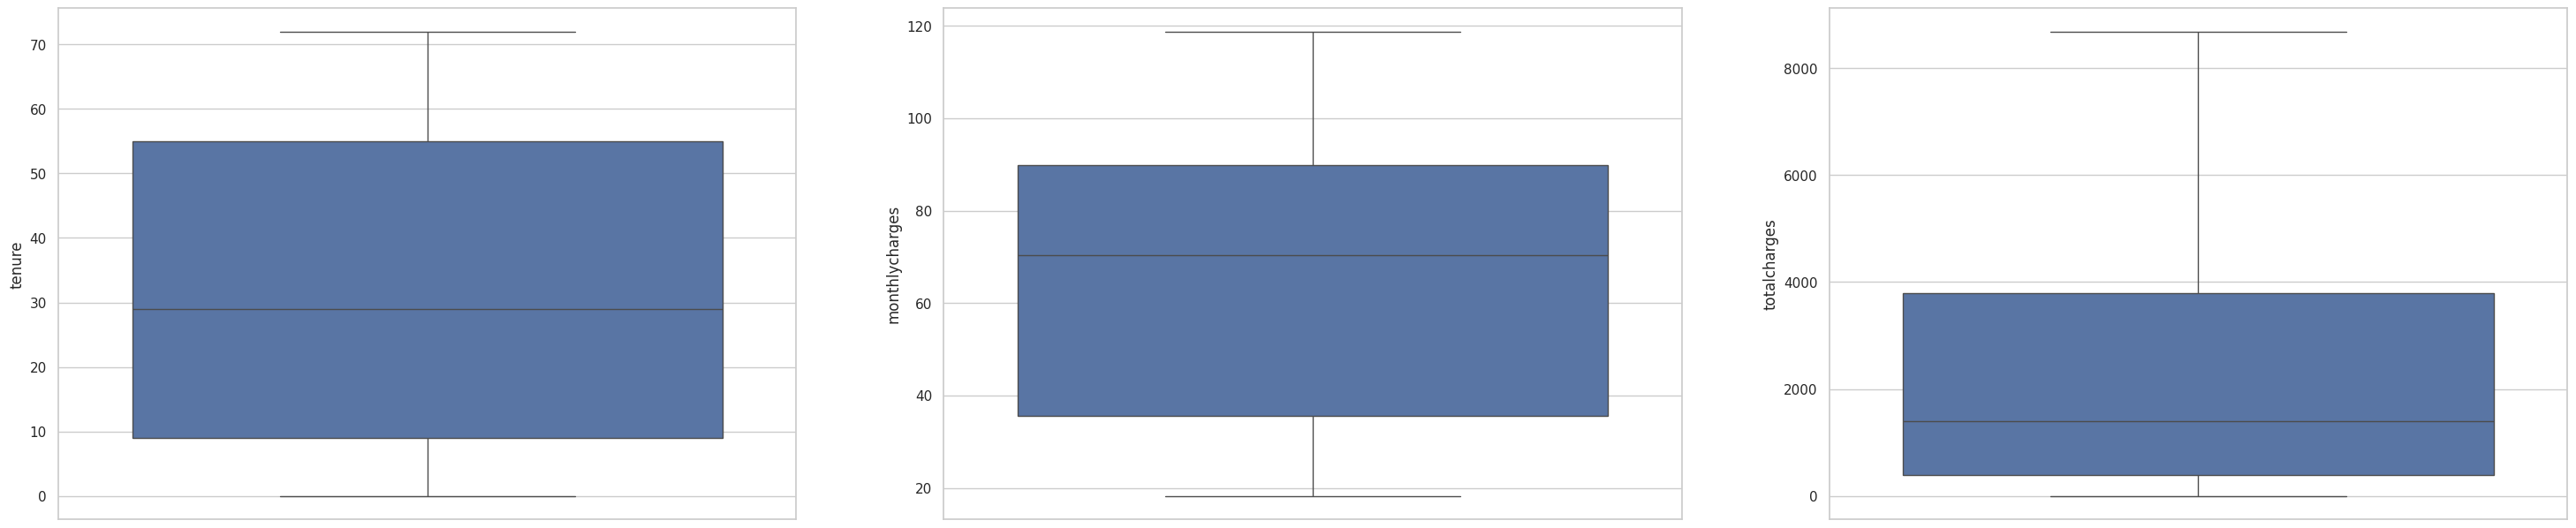

CPU times: user 21 µs, sys: 3 µs, total: 24 µs
Wall time: 59.8 µs


In [30]:
sns.set(style="whitegrid")
fig = plt.figure(figsize=(20, 50))
fig.subplots_adjust(right=1.5)

for plot in range(1, len(numerical_data.columns)+1):
    plt.subplot(6, 3, plot)
    sns.boxplot(y=df4[numerical_data.columns[plot-1]])

plt.show()
%time

In [31]:
cnt_lst1 = numerical_data.columns
cnt_lst1

Index(['tenure', 'monthlycharges', 'totalcharges'], dtype='object')

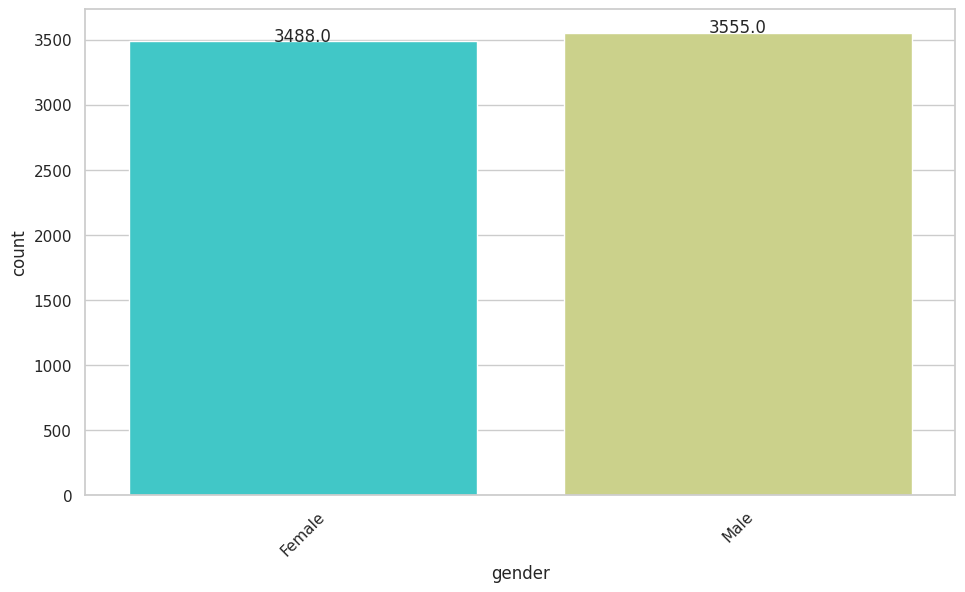

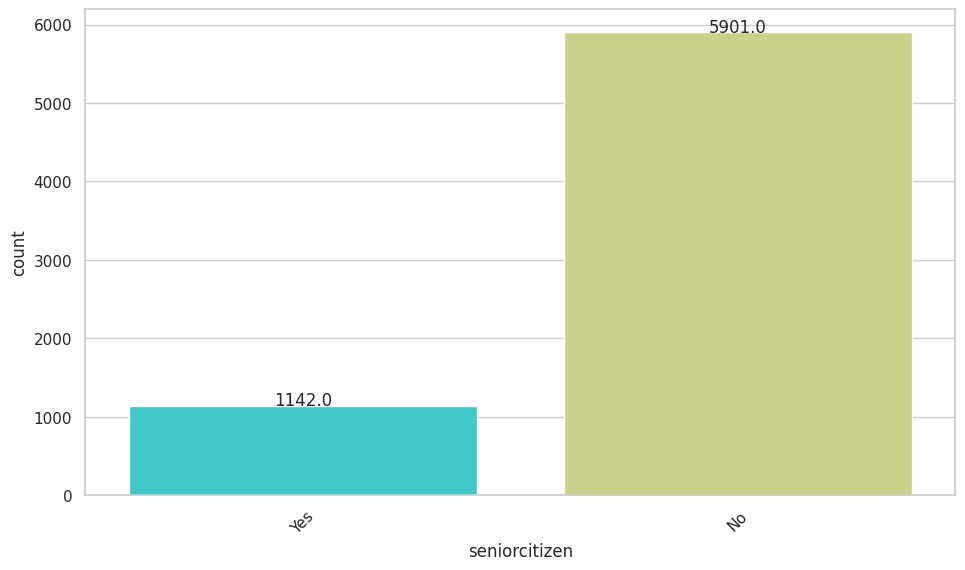

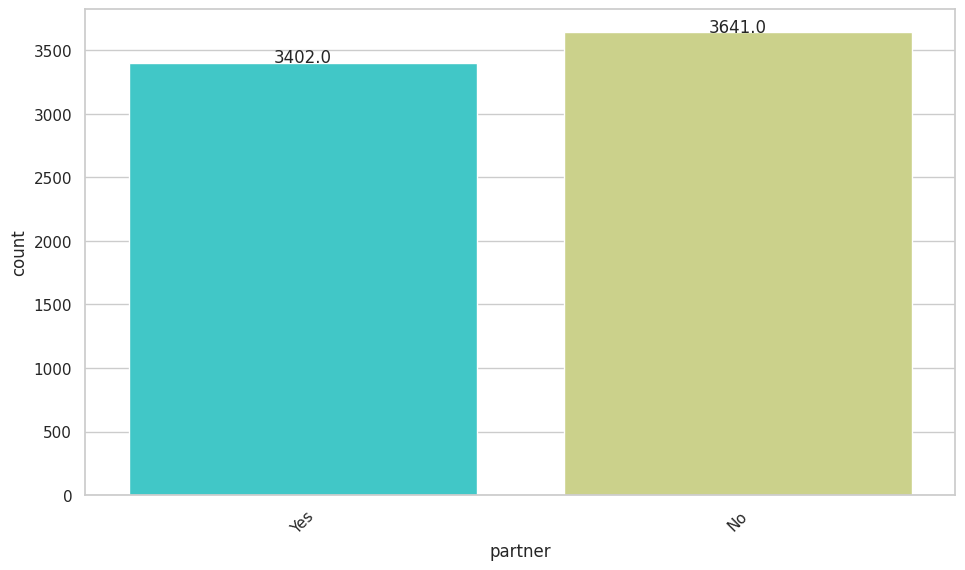

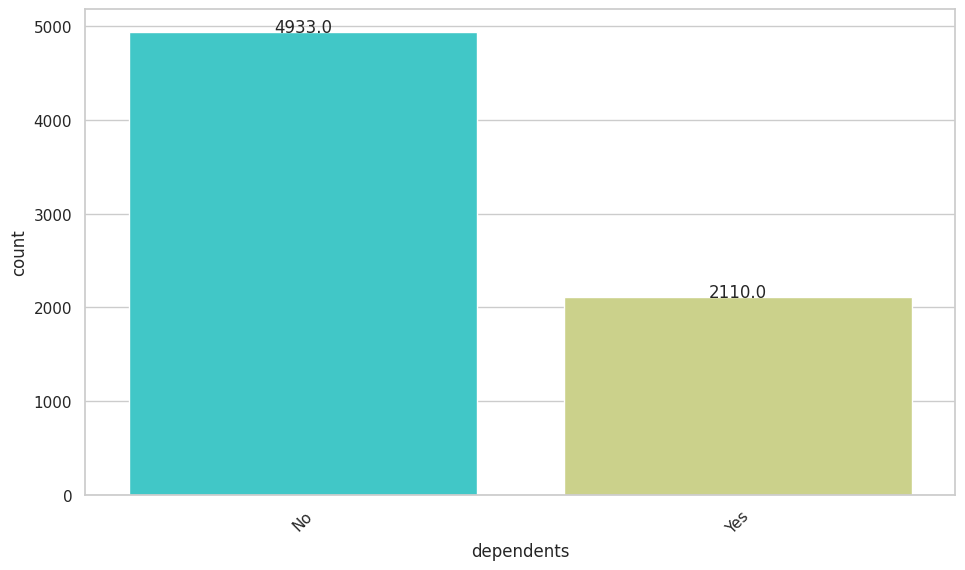

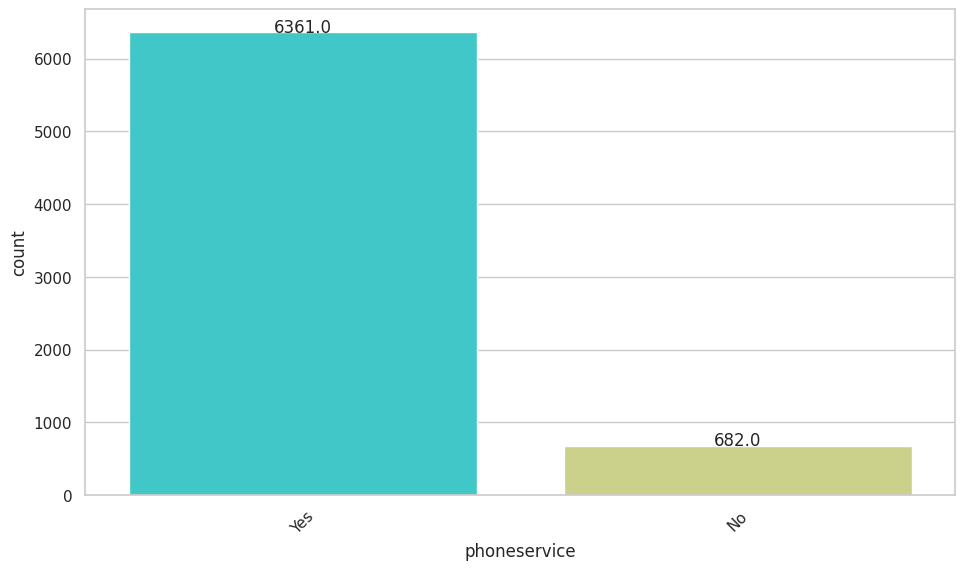

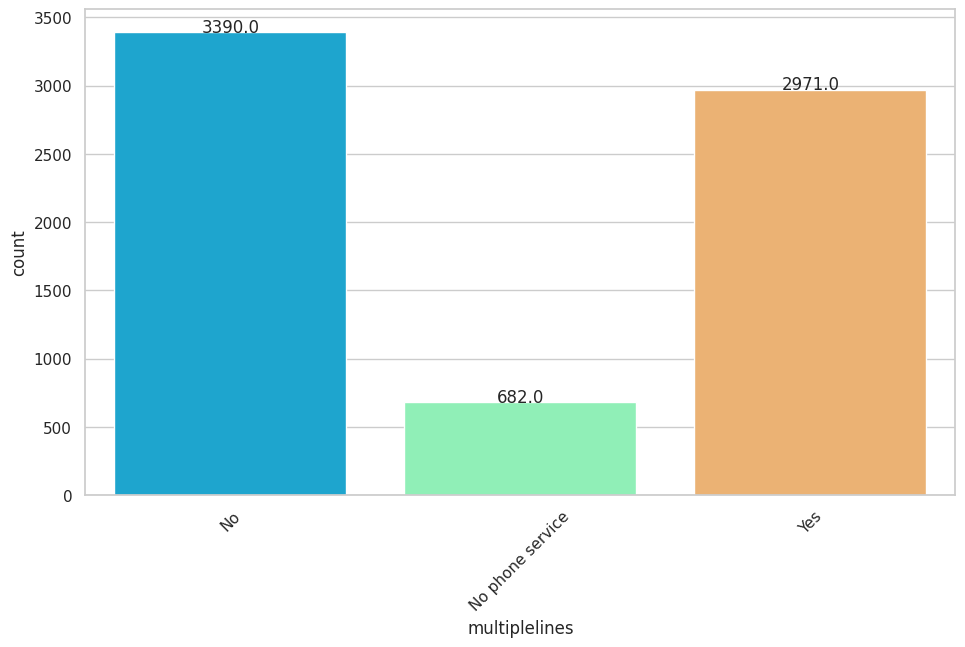

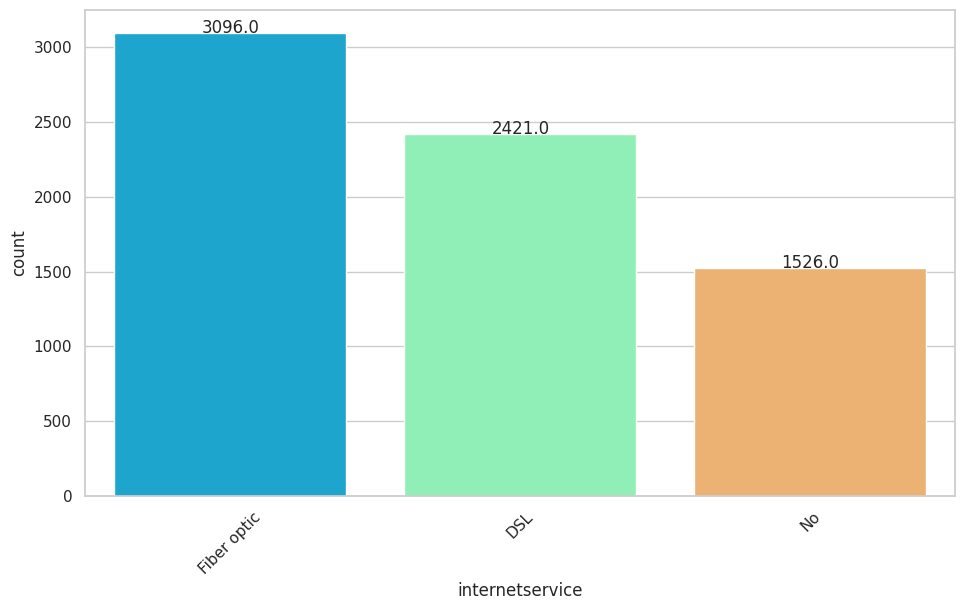

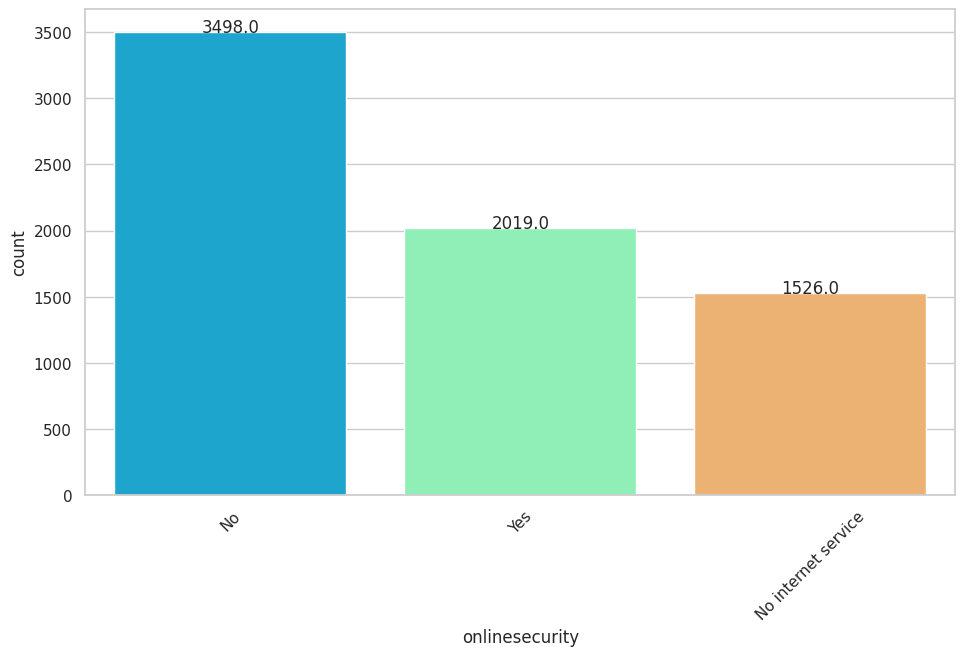

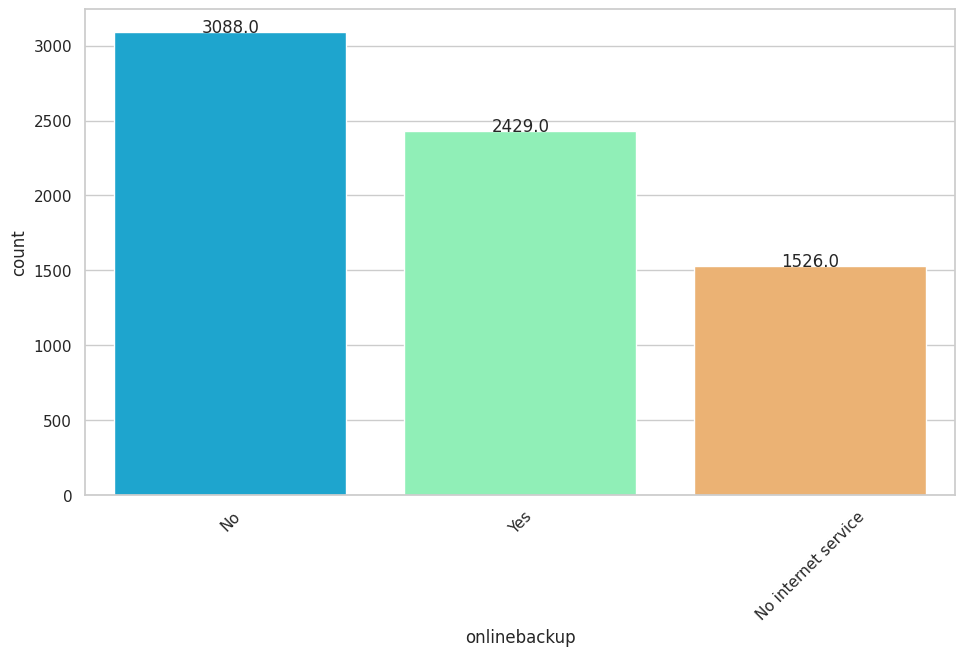

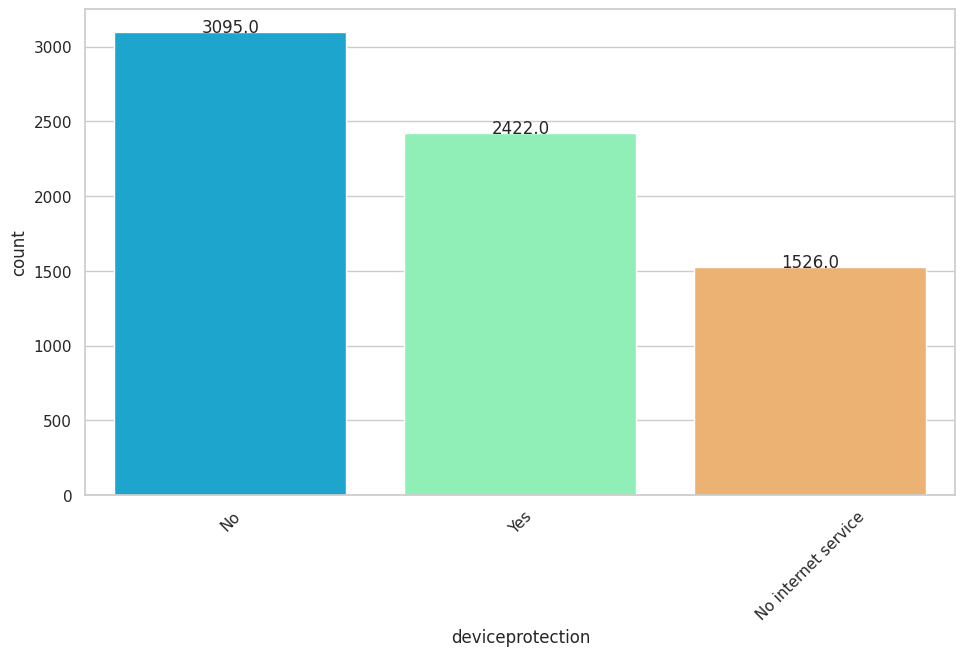

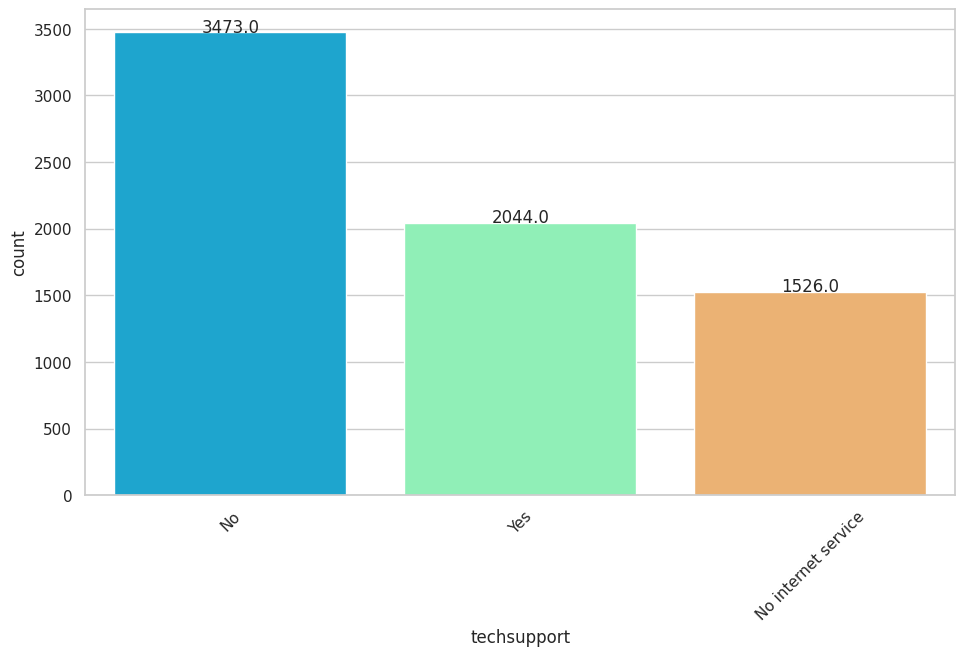

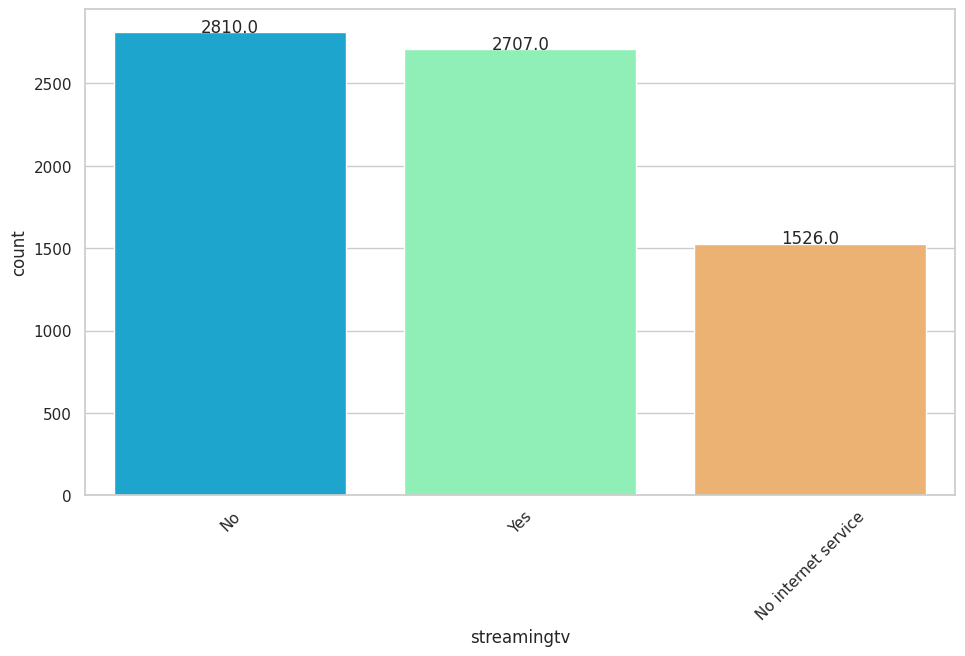

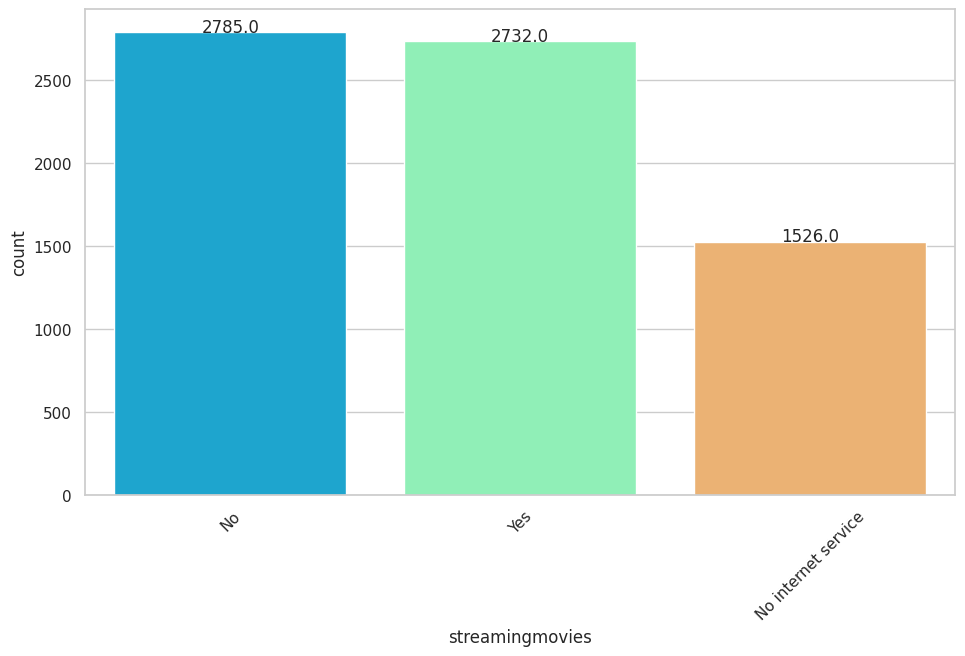

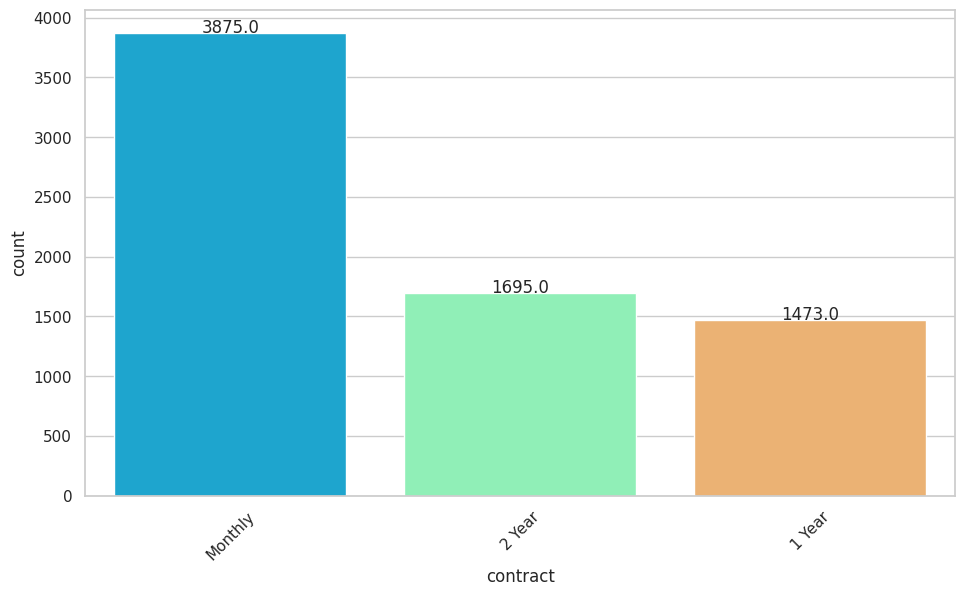

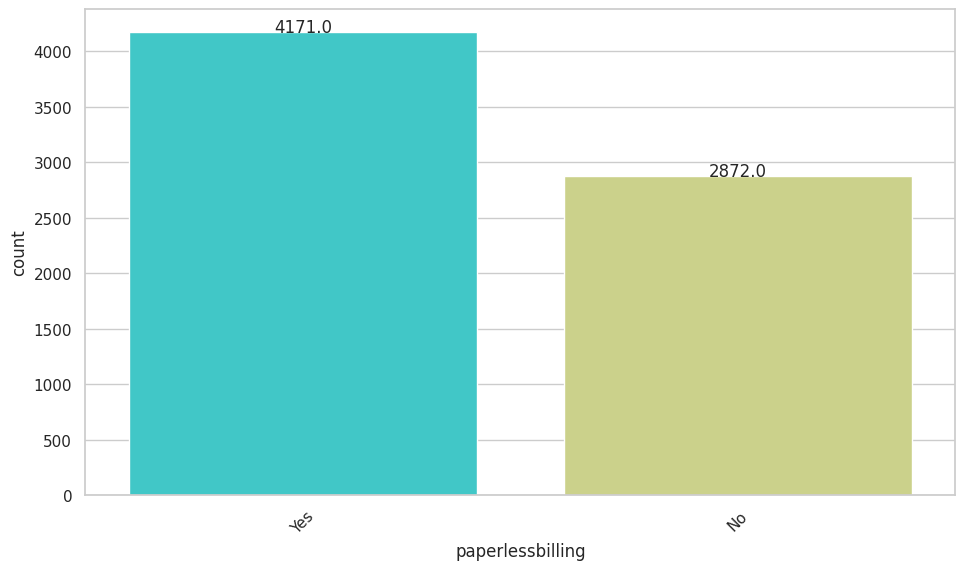

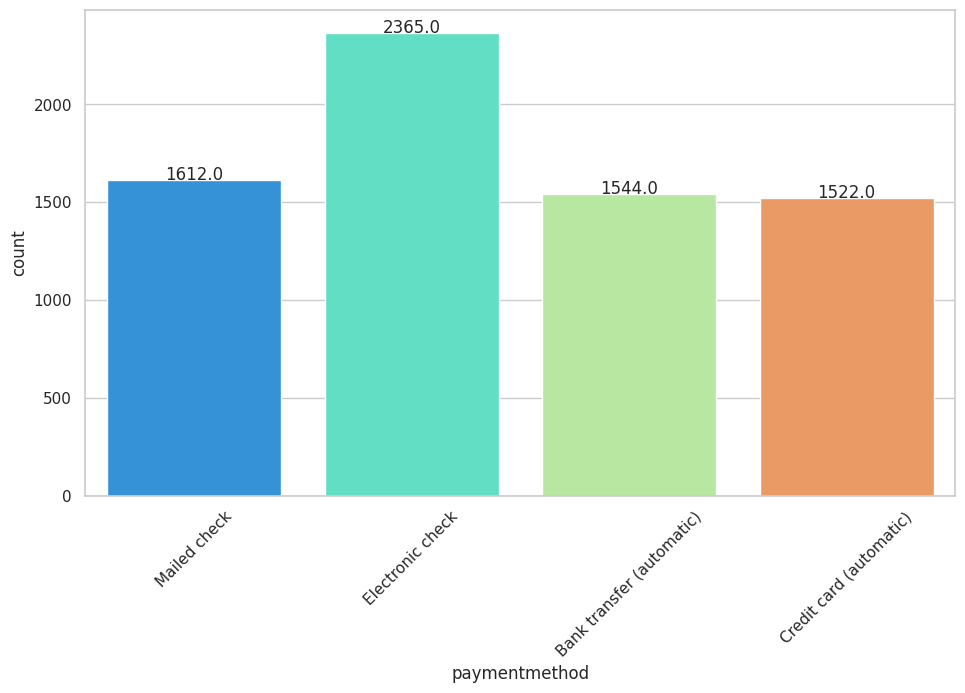

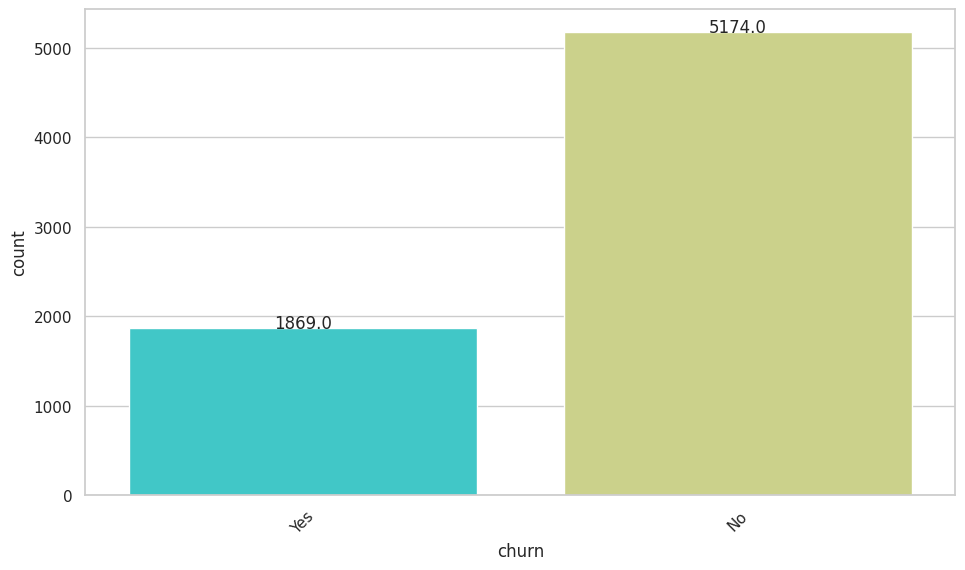

In [32]:
# visualize the distribution of categorical variables
def cnt_plot(data, col):
    plt.figure(figsize=(10, 6))
    ax1 = sns.countplot(x=col, data=data, hue=col, palette='rainbow', legend=False)

    for p in ax1.patches:
        ax1.annotate('{}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height() + 1), ha='center')

    plt.xticks(rotation=45)  # Rotate X-axis labels
    plt.show()

    print('\n')

cnt_lst1 = categorical_data.columns
#cnt_lst1 = ['seniorcitizen', 'tenure', 'monthlycharges', 'totalcharges']

for col in cnt_lst1:
    cnt_plot(df5, col)

### Features Dimensions and Distributions

In [33]:
df6 = df5.copy()

In [34]:
# let's have a look at how many unique labels each feature has
# nunique() counts the unique values in every column and dropna=True argument makes sure we ignore NaN
print(df6.nunique(dropna=True).sort_values(ascending=False))

totalcharges        6531
monthlycharges      1585
tenure                73
paymentmethod          4
deviceprotection       3
contract               3
multiplelines          3
internetservice        3
onlinesecurity         3
onlinebackup           3
techsupport            3
streamingtv            3
streamingmovies        3
paperlessbilling       2
gender                 2
seniorcitizen          2
phoneservice           2
dependents             2
partner                2
churn                  2
dtype: int64


### Target Distribution

In [35]:
df7 = df6.copy()
df7.loc[:,'churn'] = df7.loc[:, 'churn'].apply(lambda x: 'churn' if x == 'Yes' else 'retain')

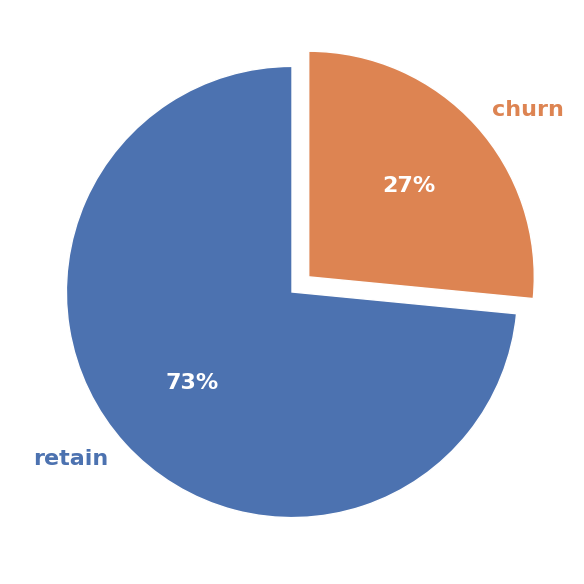

In [36]:
pie_data = df7['churn'].value_counts(normalize=True).values * 100
pie_label = df7['churn'].value_counts(normalize=True).index.to_list()

fig, ax = plt.subplots(figsize=(8,6))

wedges, texts, autotexts = ax.pie(pie_data, labels=pie_label,
                                  startangle=90, explode=[0, 0.1],
                                  autopct='%.0f%%',
                                  textprops={'color':'w', 'fontsize':16, 'weight':'bold'})

for i, wedge in enumerate(wedges):
  texts[i].set_color(wedge.get_facecolor())

plt.tight_layout()
plt.show()

27% of customers tend to leave the services, which is an indication of the imbalanced dataset.

### Categorical Churn probability

In [37]:
def stacked_bar_plot(data, x, y, orient='horizontal', ax=None, show=True):
  # create axis if not present
  if ax == None:
    _, ax = plt.subplots(figsize=(8,6))

  # create crosstab based on the input data
  crosstab = pd.crosstab(index=data[x], columns=data[y], normalize='index')
  crosstab = crosstab.reindex(['retain', 'churn'], axis=1)

  # visualize stacked barplot
  if orient == 'vertical':
    # order in descending (the highest value on the left)
    crosstab = crosstab.sort_values('churn', ascending=False)
    crosstab.plot(kind='bar', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, y_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(x=i,
                  y=(y_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_yticklabels([])
  else: # default is horizontal bar plot, even if the orient input is an arbitrary value
    # orient in ascending (the highest value on the top)
    crosstab = crosstab.sort_values('churn', ascending=True)
    crosstab.plot(kind='barh', stacked=True, ax=ax)

    # add percentage label
    for i, index in enumerate(crosstab.index):
        for (proportion, x_loc) in zip(crosstab.loc[index], crosstab.loc[index].cumsum()):
          ax.text(y=i,
                  x=(x_loc - proportion) + (proportion / 2),
                  s=f'{proportion*100:.1f}%',
                  color='white',
                  fontsize=14,
                  fontweight='bold',
                  horizontalalignment='center',
                  verticalalignment='center')
    # remove tick labels
    ax.set_xticklabels([])

  x_titleize = inflection.titleize(x)
  ax.set_title(f'Customer Churn Probability by {x_titleize}')
  ax.set_xlabel('')
  ax.set_ylabel('')
  ax.legend(loc='center left', bbox_to_anchor=(1, 0.5), title='', frameon=False)
  # ax.legend(loc='lower center', bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)
  sns.despine(left=True, bottom=True)

  if show:
    plt.show()

#### Churn Probabilities by Gender and Senior Citizen

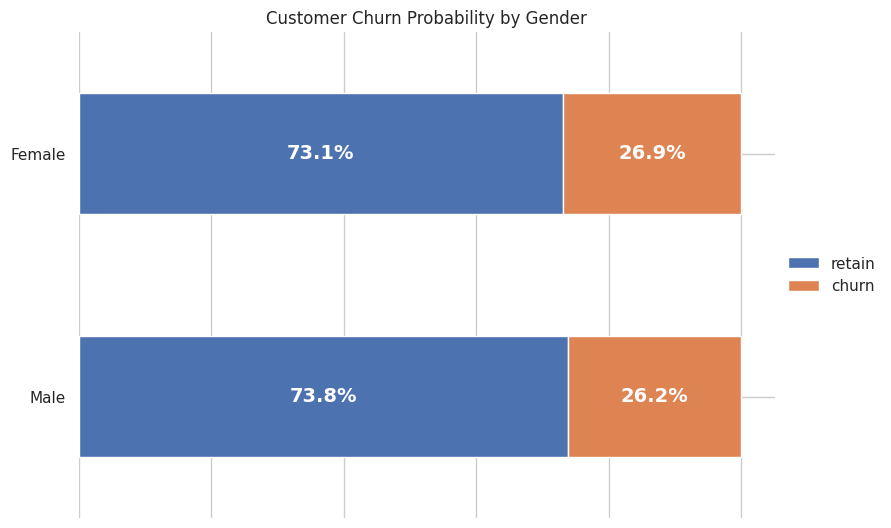

In [38]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=df7, x='gender', y='churn', ax=ax)

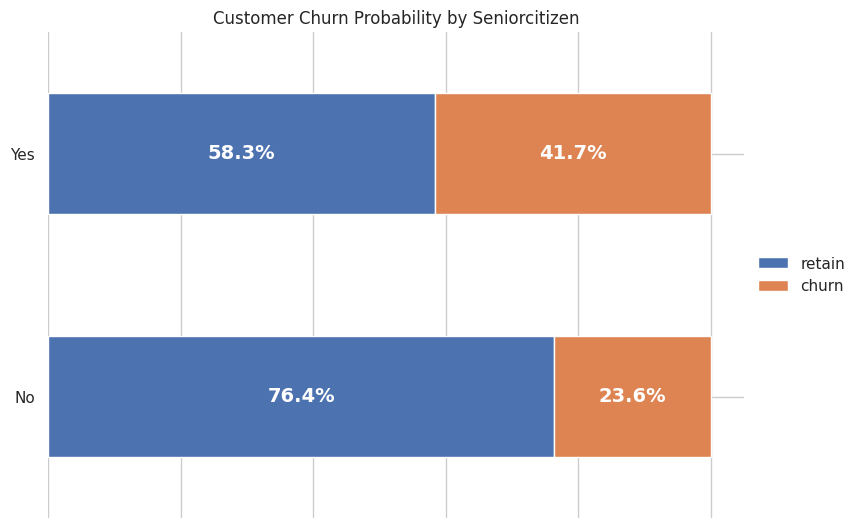

In [39]:
fig, ax = plt.subplots(figsize=(8,6))

stacked_bar_plot(data=df7, x='seniorcitizen', y='churn', ax=ax)

So, Senior citizens have a higher probability of churn than younger citizens.
This attribute has a stronger relationship with churn status.

#### Churn Probabilities of all categories

In [40]:
cat_feature = categorical_data.drop('churn', axis=1)

In [41]:
columns = df7['churn']

attr_crosstab = pd.DataFrame()

for col in cat_feature:
  # create crosstab for each attribute
  index = df7[col]
  ct = pd.crosstab(index=index, columns=columns, normalize='index', colnames=[None]).reset_index()

  # add prefix to each category
  # format: column name (category)
  col_titleize = inflection.titleize(col)
  ct[col] = ct[col].apply(lambda x: f'{col_titleize} ({x})')

  # rename the column
  ct.rename(columns={col:'feature'}, inplace=True)

  # create a single dataframe
  attr_crosstab = pd.concat([attr_crosstab, ct])

attr_crosstab = attr_crosstab.sort_values('churn', ascending=False).reset_index(drop=True)
attr_crosstab.style.background_gradient()

#### Top 5 Churners

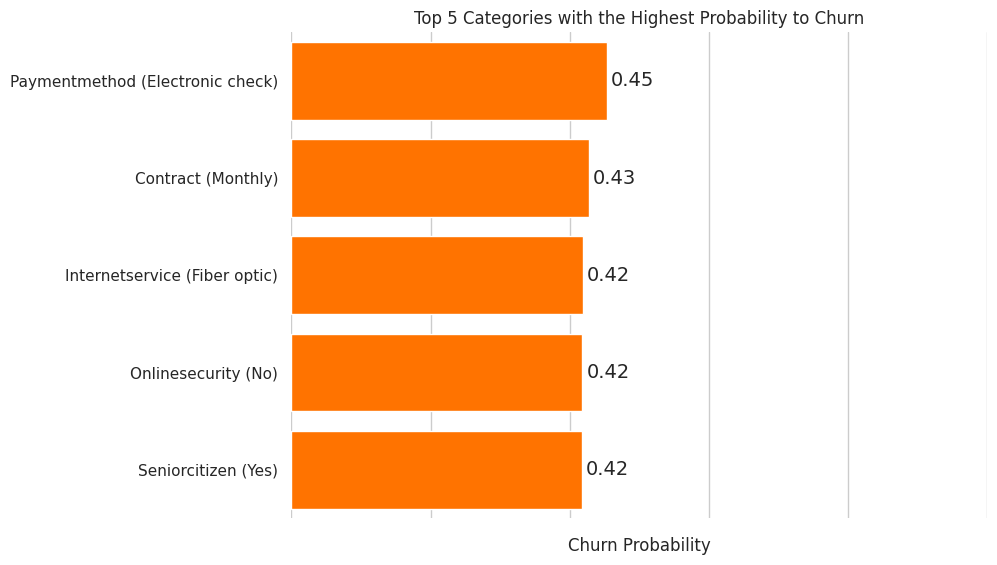

In [42]:
fig, ax = plt.subplots(figsize=(8,6))

# Using 'color' instead of 'palette' as only one color is needed
sns.barplot(data=attr_crosstab.iloc[:5], x='churn', y='feature', ax=ax, color='#FF7300', saturation=1)

# Adding bar labels for clarity
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# Customizing the plot
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Highest Probability to Churn')

# Setting x-axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylabel('')  # Clearing y-axis label
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])  # Hiding x-axis tick labels for a cleaner look
sns.despine(left=True, bottom=True)  # Removing spines for visual improvement

plt.show()

#### Least 5 Churners probability

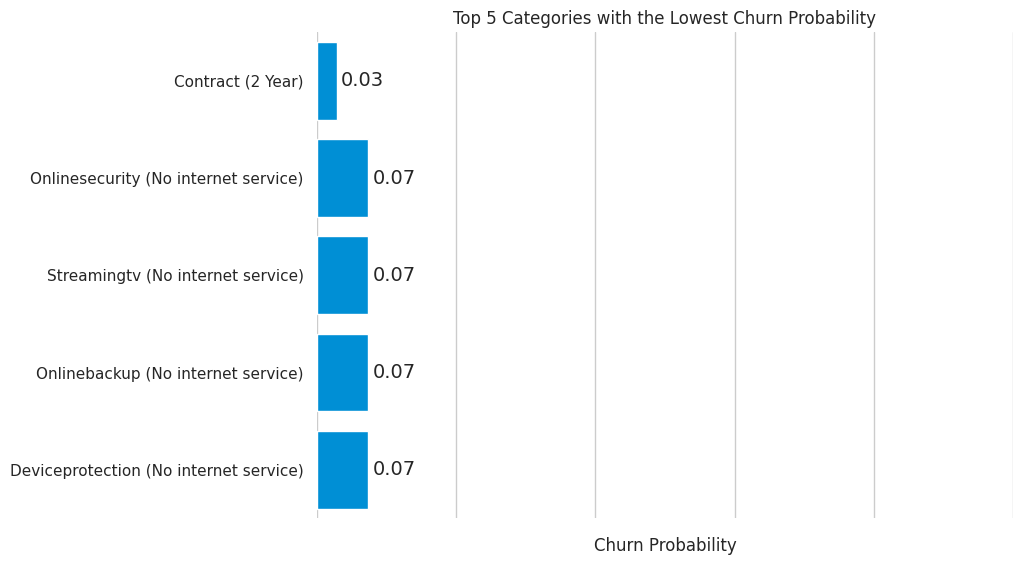

In [43]:
fig, ax = plt.subplots(figsize=(8,6))

# Sorting the data by 'churn' within the plotting call
# Using 'color' instead of 'palette' as only one color is needed
sns.barplot(data=attr_crosstab.iloc[-5:].sort_values(by='churn'), x='churn', y='feature', ax=ax, color='#008FD5', saturation=1)

# Adding bar labels for clarity
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# Customizing the plot
ax.grid(False, axis='y')
ax.set_title('Top 5 Categories with the Lowest Churn Probability')

# Setting x-axis limits and labels
ax.set_xlim(0, 1)
ax.set_ylabel('')  # Clearing y-axis label
ax.set_xlabel('Churn Probability')

ax.set_xticklabels([])  # Hiding x-axis tick labels for a cleaner look
sns.despine(left=True, bottom=True)  # Removing spines for visual improvement

plt.show()

### Numerical Churn Probability

#### Tenure

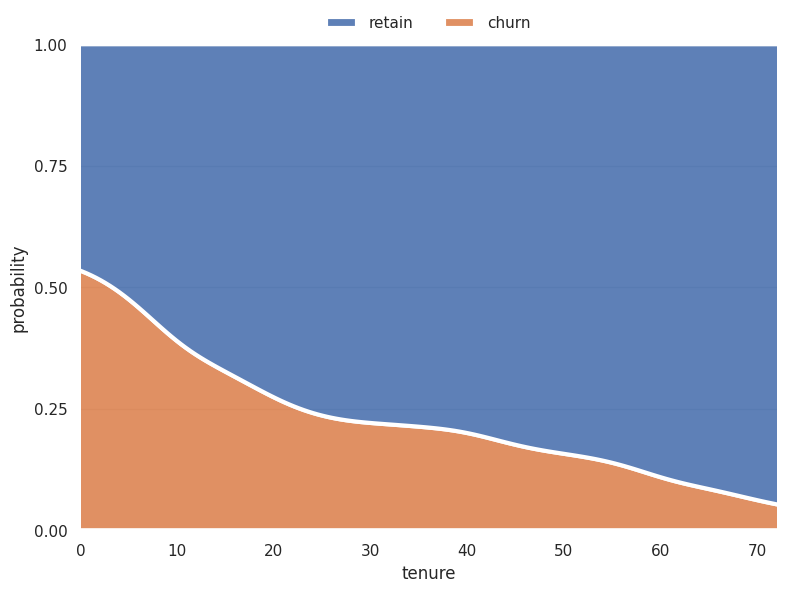

In [44]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=df7, x='tenure', hue='churn', hue_order=['retain', 'churn'], multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,df7['tenure'].max(),10))
ax.set_xlim(df7['tenure'].min(),df7['tenure'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')

sns.despine(left=True, bottom=True)

# ax.axis('tight')
plt.show()

Tenure has a negative correlation with the probability of churn!

#### Tenure by the Contract types

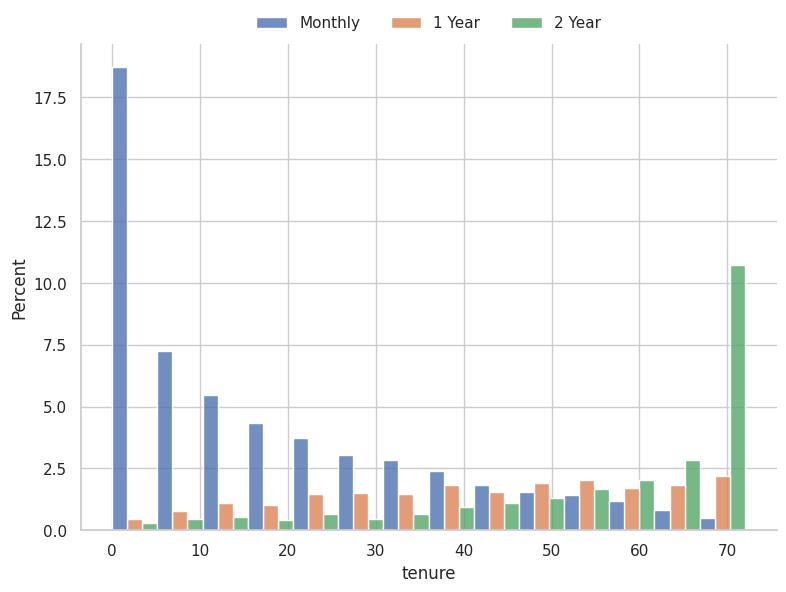

In [45]:
fig, ax = plt.subplots(figsize=(8, 6))

sns.histplot(data=df7, x='tenure', hue='contract', hue_order=['Monthly', '1 Year', '2 Year'], stat='percent', multiple='dodge', ax=ax, binwidth=5, alpha=0.8)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

sns.despine()
plt.show()

It can be seen that customers who take month-to-month contracts mostly have short tenures. There are around 20% of customers who have a month-to-month contract and tenure is less than 5 months.

This could be a new assumption:

*   Short tenure means that the customer is still new to the service

*   New customers have a tendency to take the shortest contract, i.e. month-to-month contract




#### Churn Probability by Monthly Charges

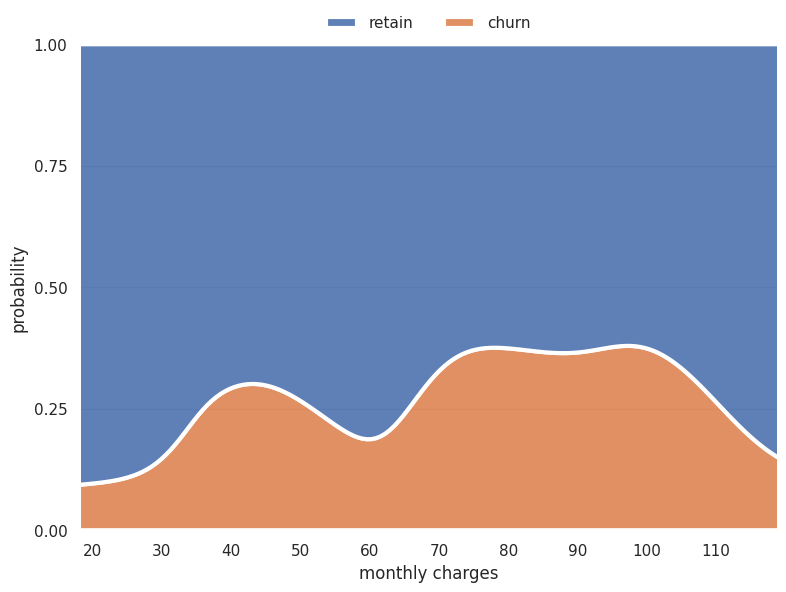

In [46]:
fig, ax = plt.subplots(figsize=(8, 6))
ax.grid(False, axis='x')
sns.kdeplot(data=df7, x='monthlycharges', hue='churn', hue_order=['retain', 'churn'], multiple='fill', linewidth=3, ax=ax, alpha=0.9)
sns.move_legend(ax, "lower center", bbox_to_anchor=(0.5, 1), title='', ncol=2, frameon=False)

ax.set_xticks(np.arange(0,df7['monthlycharges'].max(),10))
ax.set_xlim(df7['monthlycharges'].min(),df7['monthlycharges'].max())

ax.set_yticks(np.linspace(0,1,5))
ax.set_ylabel('probability')
ax.set_xlabel('monthly charges')

sns.despine(left=True, bottom=True)

# ax.axis('tight')
plt.show()

There is no distinct pattern visible.

For instance, at 60, it decreases, then unexpectedly rises, and drops again when the monthly charges exceed 100.

This suggests that higher prices may offer enough value to make customers think, "This is worth spending my hard-earned money on."

#### Numerical Data Distribution

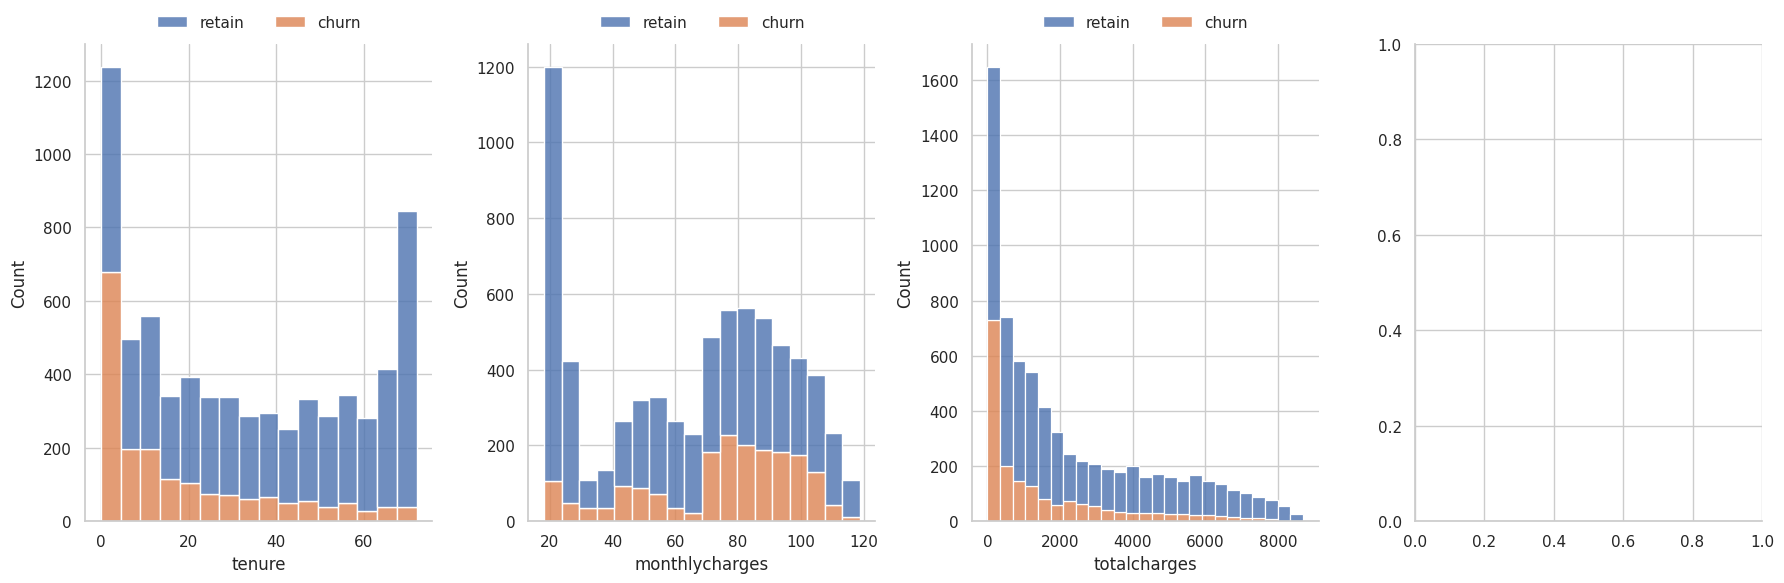

In [47]:
fig, ax = plt.subplots(1, 4, figsize=(18,6))

for i, col in enumerate(numerical_data):
  sns.histplot(data=df7, x=col, hue='churn', hue_order=['retain', 'churn'], multiple='stack', ax=ax[i], alpha=0.8)
  sns.move_legend(ax[i], "lower center", bbox_to_anchor=(0.5, 1), ncol=3, title='', frameon=False)

plt.tight_layout()
sns.despine()
plt.show()

 The numerical data distribution is not in normally distributed.

## Data Preprocessing

#### Train - Test Split
A 80% : 20% ratio is used for the training set and testing set respectively.

In [48]:
df8 = df7.copy()

In [49]:
df8['churn'] = df8['churn'].map({'churn': 'yes', 'retain': 'no'})

In [50]:
data_X = df8.drop('churn', axis=1)
data_y = df8['churn']

X_train, X_test, y_train, y_test = train_test_split(data_X, data_y, test_size=0.3,
                                                    random_state=1, stratify=data_y)

In [51]:
print('X shape\t\t:', data_X.shape)
print('y shape\t\t:', data_y.shape)
print()
print('X_train shape\t:', X_train.shape)
print('y_train shape\t:', y_train.shape)
print()
print('X_test shape\t:', X_test.shape)
print('y_test shape\t:', y_test.shape)

X shape		: (7043, 19)
y shape		: (7043,)

X_train shape	: (4930, 19)
y_train shape	: (4930,)

X_test shape	: (2113, 19)
y_test shape	: (2113,)


#### Label Encoding
Used for the target variable (label).

In [52]:
le = LabelEncoder()

le.fit(y_train)

y_train_encode = le.transform(y_train)
y_test_encode = le.transform(y_test)

In [53]:
le.classes_

array(['no', 'yes'], dtype=object)

In [54]:
print(y_train[:5].values)
print(y_train_encode[:5])

['no' 'yes' 'no' 'yes' 'no']
[0 1 0 1 0]


#### One Hot Encoding
The one-hot encoding is used for input variables (features) because each feature has no natural ordering.

In [55]:
# Ensure categorical_columns are a list of column names
categorical_columns = categorical_data.columns.drop('churn').tolist()
print("Categorical column names to be used:", categorical_columns)

Categorical column names to be used: ['gender', 'seniorcitizen', 'partner', 'dependents', 'phoneservice', 'multiplelines', 'internetservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection', 'techsupport', 'streamingtv', 'streamingmovies', 'contract', 'paperlessbilling', 'paymentmethod']


In [56]:
# Check for any columns in categorical_columns not in X_train
missing_cols = [col for col in categorical_columns if col not in X_train.columns]
print("Missing columns in X_train:", missing_cols)

Missing columns in X_train: []


In [57]:
# drop 1 category if the feature only has 2 categories
ohe = OneHotEncoder(sparse_output=False, drop='if_binary')

ohe.fit(X_train[categorical_columns])

X_train_ohe = ohe.transform(X_train[categorical_columns])
X_test_ohe = ohe.transform(X_test[categorical_columns])

In [58]:
# Save the OneHotEncoder object
with open("ohe.pkl", "wb") as file:
    pickle.dump(ohe, file)
# Download the saved pickle file
files.download("ohe.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [59]:
X_train_ohe

array([[1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       ...,
       [0., 1., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 1., 0., ..., 0., 1., 0.]])

#### Encoded Dataframe
Combine the encoded features and the numerical features. Make sure that the index is the same. Also, make sure the new column names are correct.

In [60]:
column_ohe = ohe.get_feature_names_out()
column_ohe

array(['gender_Male', 'seniorcitizen_Yes', 'partner_Yes',
       'dependents_Yes', 'phoneservice_Yes', 'multiplelines_No',
       'multiplelines_No phone service', 'multiplelines_Yes',
       'internetservice_DSL', 'internetservice_Fiber optic',
       'internetservice_No', 'onlinesecurity_No',
       'onlinesecurity_No internet service', 'onlinesecurity_Yes',
       'onlinebackup_No', 'onlinebackup_No internet service',
       'onlinebackup_Yes', 'deviceprotection_No',
       'deviceprotection_No internet service', 'deviceprotection_Yes',
       'techsupport_No', 'techsupport_No internet service',
       'techsupport_Yes', 'streamingtv_No',
       'streamingtv_No internet service', 'streamingtv_Yes',
       'streamingmovies_No', 'streamingmovies_No internet service',
       'streamingmovies_Yes', 'contract_1 Year', 'contract_2 Year',
       'contract_Monthly', 'paperlessbilling_Yes',
       'paymentmethod_Bank transfer (automatic)',
       'paymentmethod_Credit card (automatic)',
    

In [61]:
for i, col in enumerate(column_ohe):
  column_ohe[i] = inflection.underscore(column_ohe[i]).replace(' ', '_').replace('_(automatic)','')

column_ohe

array(['gender_male', 'seniorcitizen_yes', 'partner_yes',
       'dependents_yes', 'phoneservice_yes', 'multiplelines_no',
       'multiplelines_no_phone_service', 'multiplelines_yes',
       'internetservice_dsl', 'internetservice_fiber_optic',
       'internetservice_no', 'onlinesecurity_no',
       'onlinesecurity_no_internet_service', 'onlinesecurity_yes',
       'onlinebackup_no', 'onlinebackup_no_internet_service',
       'onlinebackup_yes', 'deviceprotection_no',
       'deviceprotection_no_internet_service', 'deviceprotection_yes',
       'techsupport_no', 'techsupport_no_internet_service',
       'techsupport_yes', 'streamingtv_no',
       'streamingtv_no_internet_service', 'streamingtv_yes',
       'streamingmovies_no', 'streamingmovies_no_internet_service',
       'streamingmovies_yes', 'contract_1_year', 'contract_2_year',
       'contract_monthly', 'paperlessbilling_yes',
       'paymentmethod_bank_transfer', 'paymentmethod_credit_card',
       'paymentmethod_electronic_ch

#### Train Set

In [62]:
X_train.head()

gender seniorcitizen partner dependents  tenure phoneservice  \
6599    Male            No      No         No      47          Yes   
6370  Female            No     Yes         No      39          Yes   
311   Female            No      No         No       1          Yes   
3263    Male           Yes      No         No       8          Yes   
745     Male           Yes      No         No      67          Yes   

     multiplelines internetservice onlinesecurity onlinebackup  \
6599            No             DSL            Yes          Yes   
6370            No     Fiber optic            Yes           No   
311             No             DSL             No           No   
3263            No     Fiber optic            Yes           No   
745            Yes     Fiber optic             No           No   

     deviceprotection techsupport streamingtv streamingmovies contract  \
6599              Yes         Yes         Yes             Yes   1 Year   
6370              Yes         Yes         Yes             Yes   1 Year   
311                No          No         Yes              No  Monthly   
3263               No         Yes         Yes             Yes  Monthly   
745                No          No          No              No  Monthly   

     paperlessbilling              paymentmethod  monthlycharges  totalcharges  
6599              Yes  Bank transfer (automatic)           86.95       4138.90  
6370              Yes    Credit card (automatic)          104.70       4134.85  
311               Yes           Electronic check           54.65         54.65  
3263               No    Credit card (automatic)          100.30        832.35  
745               Yes               Mailed check           75.70       5060.85

In [63]:
# create dataframe from one-hot encoded features
X_train_ohe_df = pd.DataFrame(X_train_ohe, columns=column_ohe, index=X_train.index)

# combine the numerical and encoded features
X_train_encode = pd.concat([X_train.drop(columns=categorical_columns), X_train_ohe_df], axis=1)
X_train_encode.head()

tenure  monthlycharges  totalcharges  gender_male  seniorcitizen_yes  \
6599      47           86.95       4138.90          1.0                0.0   
6370      39          104.70       4134.85          0.0                0.0   
311        1           54.65         54.65          0.0                0.0   
3263       8          100.30        832.35          1.0                1.0   
745       67           75.70       5060.85          1.0                1.0   

      partner_yes  dependents_yes  phoneservice_yes  multiplelines_no  \
6599          0.0             0.0               1.0               1.0   
6370          1.0             0.0               1.0               1.0   
311           0.0             0.0               1.0               1.0   
3263          0.0             0.0               1.0               1.0   
745           0.0             0.0               1.0               0.0   

      multiplelines_no_phone_service  ...  \
6599                             0.0  ...   
6370                             0.0  ...   
311                              0.0  ...   
3263                             0.0  ...   
745                              0.0  ...   

      streamingmovies_no_internet_service  streamingmovies_yes  \
6599                                  0.0                  1.0   
6370                                  0.0                  1.0   
311                                   0.0                  0.0   
3263                                  0.0                  1.0   
745                                   0.0                  0.0   

      contract_1_year  contract_2_year  contract_monthly  \
6599              1.0              0.0               0.0   
6370              1.0              0.0               0.0   
311               0.0              0.0               1.0   
3263              0.0              0.0               1.0   
745               0.0              0.0               1.0   

      paperlessbilling_yes  paymentmethod_bank_transfer  \
6599                   1.0                          1.0   
6370                   1.0                          0.0   
311                    1.0                          0.0   
3263                   0.0                          0.0   
745                    1.0                          0.0   

      paymentmethod_credit_card  paymentmethod_electronic_check  \
6599                        0.0                             0.0   
6370                        1.0                             0.0   
311                         0.0                             1.0   
3263                        1.0                             0.0   
745                         0.0                             0.0   

      paymentmethod_mailed_check  
6599                         0.0  
6370                         0.0  
311                          0.0  
3263                         0.0  
745                          1.0  

[5 rows x 40 columns]

####  Test Set

In [64]:
X_test.head()

gender seniorcitizen partner dependents  tenure phoneservice  \
2495    Male            No      No         No      10          Yes   
971     Male            No      No         No      10          Yes   
3571  Female            No     Yes        Yes      18          Yes   
1507  Female            No      No         No       9          Yes   
1901    Male            No      No         No      24          Yes   

     multiplelines internetservice       onlinesecurity         onlinebackup  \
2495           Yes             DSL                  Yes                   No   
971            Yes             DSL                   No                   No   
3571            No              No  No internet service  No internet service   
1507            No     Fiber optic                   No                   No   
1901           Yes     Fiber optic                   No                   No   

         deviceprotection          techsupport          streamingtv  \
2495                   No                   No                   No   
971                    No                   No                  Yes   
3571  No internet service  No internet service  No internet service   
1507                   No                   No                   No   
1901                  Yes                   No                  Yes   

          streamingmovies contract paperlessbilling            paymentmethod  \
2495                   No  Monthly              Yes  Credit card (automatic)   
971                   Yes  Monthly              Yes  Credit card (automatic)   
3571  No internet service  Monthly              Yes             Mailed check   
1507                   No  Monthly               No         Electronic check   
1901                   No  Monthly              Yes             Mailed check   

      monthlycharges  totalcharges  
2495           54.50        568.20  
971            72.15        794.25  
3571           20.25        401.95  
1507           69.05        651.50  
1901           89.85       2165.05

In [65]:
# create dataframe from one-hot encoded features
X_test_ohe_df = pd.DataFrame(X_test_ohe, columns=column_ohe, index=X_test.index)

# combine the numerical and encoded features
X_test_encode = pd.concat([X_test.drop(columns=categorical_columns), X_test_ohe_df], axis=1)
X_test_encode.head()

tenure  monthlycharges  totalcharges  gender_male  seniorcitizen_yes  \
2495      10           54.50        568.20          1.0                0.0   
971       10           72.15        794.25          1.0                0.0   
3571      18           20.25        401.95          0.0                0.0   
1507       9           69.05        651.50          0.0                0.0   
1901      24           89.85       2165.05          1.0                0.0   

      partner_yes  dependents_yes  phoneservice_yes  multiplelines_no  \
2495          0.0             0.0               1.0               0.0   
971           0.0             0.0               1.0               0.0   
3571          1.0             1.0               1.0               1.0   
1507          0.0             0.0               1.0               1.0   
1901          0.0             0.0               1.0               0.0   

      multiplelines_no_phone_service  ...  \
2495                             0.0  ...   
971                              0.0  ...   
3571                             0.0  ...   
1507                             0.0  ...   
1901                             0.0  ...   

      streamingmovies_no_internet_service  streamingmovies_yes  \
2495                                  0.0                  0.0   
971                                   0.0                  1.0   
3571                                  1.0                  0.0   
1507                                  0.0                  0.0   
1901                                  0.0                  0.0   

      contract_1_year  contract_2_year  contract_monthly  \
2495              0.0              0.0               1.0   
971               0.0              0.0               1.0   
3571              0.0              0.0               1.0   
1507              0.0              0.0               1.0   
1901              0.0              0.0               1.0   

      paperlessbilling_yes  paymentmethod_bank_transfer  \
2495                   1.0                          0.0   
971                    1.0                          0.0   
3571                   1.0                          0.0   
1507                   0.0                          0.0   
1901                   1.0                          0.0   

      paymentmethod_credit_card  paymentmethod_electronic_check  \
2495                        1.0                             0.0   
971                         1.0                             0.0   
3571                        0.0                             0.0   
1507                        0.0                             1.0   
1901                        0.0                             0.0   

      paymentmethod_mailed_check  
2495                         0.0  
971                          0.0  
3571                         1.0  
1507                         0.0  
1901                         1.0  

[5 rows x 40 columns]

#### Encoded Dataframe

In [66]:
# combine the X-train and X-test
data_encode = pd.concat([X_train_encode, X_test_encode], axis=0)

# combine with the y-train
data_encode = data_encode.join(pd.Series(y_train_encode, name='churn', index=X_train_encode.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_encode = data_encode.join(pd.Series(y_test_encode, name='churn', index=X_test_encode.index), lsuffix='_1', rsuffix='_2')

# Merging the y-train and y-test column
data_encode['churn_1'] = data_encode['churn_1'].fillna(data_encode['churn_2'])
data_encode.drop(columns='churn_2', inplace=True)
data_encode.rename(columns={'churn_1': 'churn'}, inplace=True)

data_encode.head()

tenure  monthlycharges  totalcharges  gender_male  seniorcitizen_yes  \
6599      47           86.95       4138.90          1.0                0.0   
6370      39          104.70       4134.85          0.0                0.0   
311        1           54.65         54.65          0.0                0.0   
3263       8          100.30        832.35          1.0                1.0   
745       67           75.70       5060.85          1.0                1.0   

      partner_yes  dependents_yes  phoneservice_yes  multiplelines_no  \
6599          0.0             0.0               1.0               1.0   
6370          1.0             0.0               1.0               1.0   
311           0.0             0.0               1.0               1.0   
3263          0.0             0.0               1.0               1.0   
745           0.0             0.0               1.0               0.0   

      multiplelines_no_phone_service  ...  streamingmovies_yes  \
6599                             0.0  ...                  1.0   
6370                             0.0  ...                  1.0   
311                              0.0  ...                  0.0   
3263                             0.0  ...                  1.0   
745                              0.0  ...                  0.0   

      contract_1_year  contract_2_year  contract_monthly  \
6599              1.0              0.0               0.0   
6370              1.0              0.0               0.0   
311               0.0              0.0               1.0   
3263              0.0              0.0               1.0   
745               0.0              0.0               1.0   

      paperlessbilling_yes  paymentmethod_bank_transfer  \
6599                   1.0                          1.0   
6370                   1.0                          0.0   
311                    1.0                          0.0   
3263                   0.0                          0.0   
745                    1.0                          0.0   

      paymentmethod_credit_card  paymentmethod_electronic_check  \
6599                        0.0                             0.0   
6370                        1.0                             0.0   
311                         0.0                             1.0   
3263                        1.0                             0.0   
745                         0.0                             0.0   

      paymentmethod_mailed_check  churn  
6599                         0.0    0.0  
6370                         0.0    1.0  
311                          0.0    0.0  
3263                         0.0    1.0  
745                          1.0    0.0  

[5 rows x 41 columns]

####  Feature Scaling
Since this dataset is not in normal distribution, hte min-max scaling is used for the numerical features.

In [67]:
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

scalers = {}

for i in numerical_data:
  scaler = MinMaxScaler()
  scaler.fit(X_train_scale[[i]])

  X_train_scale[[i]] = scaler.transform(X_train_scale[[i]])
  X_test_scale[[i]] = scaler.transform(X_test_scale[[i]])
  # Save the scaler for later use
  scalers[i] = scaler

In [68]:
numerical_data

tenure  monthlycharges  totalcharges
0          1           70.45         70.45
1          1           70.60         70.60
2          1           70.00         70.00
3          1           69.55         69.55
4          1           71.10         71.10
...      ...             ...           ...
7038      18           19.65        411.25
7039      15           19.65        332.65
7040      14           19.75        309.35
7041      13           19.95        257.00
7042      15           18.80        294.95

[7043 rows x 3 columns]

In [69]:
X_train_scale = X_train_encode.copy()
X_test_scale = X_test_encode.copy()

num_data = ['tenure', 'monthlycharges', 'totalcharges']  # Adjust this list as necessary

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Fit the scaler only on numerical columns in the training set
scaler.fit(X_train_scale[num_data])

# Transform both training and test datasets
X_train_scale[num_data] = scaler.transform(X_train_scale[num_data])
X_test_scale[num_data] = scaler.transform(X_test_scale[num_data])

In [70]:
# Save all scalers into a single pickle file
# Save the scalers dictionary to a file
with open("scaler.pkl", "wb") as file:
    pickle.dump(scaler, file)

# Download the file
files.download("scaler.pkl")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

#### Scaled Dataframe
The dataframe has been encoded and scaled

In [71]:
# combine the X-train and X-test
data_scale = pd.concat([X_train_scale, X_test_scale], axis=0)

# combine with the y-train
data_scale = data_scale.join(pd.Series(y_train_encode, name='churn', index=X_train_scale.index), lsuffix='_1', rsuffix='_2')

# combine with the y-test
data_scale = data_scale.join(pd.Series(y_test_encode, name='churn', index=X_test_scale.index), lsuffix='_1', rsuffix='_2')

# Merge the y-train and y-test column
data_scale['churn_1'] = data_scale['churn_1'].fillna(data_scale['churn_2'])
data_scale.drop(columns='churn_2', inplace=True)
data_scale.rename(columns={'churn_1': 'churn'}, inplace=True)

data_scale.head()

tenure  monthlycharges  totalcharges  gender_male  seniorcitizen_yes  \
6599   0.653           0.683         0.477          1.0                0.0   
6370   0.542           0.860         0.476          0.0                0.0   
311    0.014           0.360         0.006          0.0                0.0   
3263   0.111           0.816         0.096          1.0                1.0   
745    0.931           0.570         0.583          1.0                1.0   

      partner_yes  dependents_yes  phoneservice_yes  multiplelines_no  \
6599          0.0             0.0               1.0               1.0   
6370          1.0             0.0               1.0               1.0   
311           0.0             0.0               1.0               1.0   
3263          0.0             0.0               1.0               1.0   
745           0.0             0.0               1.0               0.0   

      multiplelines_no_phone_service  ...  streamingmovies_yes  \
6599                             0.0  ...                  1.0   
6370                             0.0  ...                  1.0   
311                              0.0  ...                  0.0   
3263                             0.0  ...                  1.0   
745                              0.0  ...                  0.0   

      contract_1_year  contract_2_year  contract_monthly  \
6599              1.0              0.0               0.0   
6370              1.0              0.0               0.0   
311               0.0              0.0               1.0   
3263              0.0              0.0               1.0   
745               0.0              0.0               1.0   

      paperlessbilling_yes  paymentmethod_bank_transfer  \
6599                   1.0                          1.0   
6370                   1.0                          0.0   
311                    1.0                          0.0   
3263                   0.0                          0.0   
745                    1.0                          0.0   

      paymentmethod_credit_card  paymentmethod_electronic_check  \
6599                        0.0                             0.0   
6370                        1.0                             0.0   
311                         0.0                             1.0   
3263                        1.0                             0.0   
745                         0.0                             0.0   

      paymentmethod_mailed_check  churn  
6599                         0.0    0.0  
6370                         0.0    1.0  
311                          0.0    0.0  
3263                         0.0    1.0  
745                          1.0    0.0  

[5 rows x 41 columns]

In [72]:
data_scale_train = pd.concat([X_train_scale, pd.Series(y_train_encode, name='churn', index=X_train_scale.index)], axis=1)
data_scale_train.head()

tenure  monthlycharges  totalcharges  gender_male  seniorcitizen_yes  \
6599   0.653           0.683         0.477          1.0                0.0   
6370   0.542           0.860         0.476          0.0                0.0   
311    0.014           0.360         0.006          0.0                0.0   
3263   0.111           0.816         0.096          1.0                1.0   
745    0.931           0.570         0.583          1.0                1.0   

      partner_yes  dependents_yes  phoneservice_yes  multiplelines_no  \
6599          0.0             0.0               1.0               1.0   
6370          1.0             0.0               1.0               1.0   
311           0.0             0.0               1.0               1.0   
3263          0.0             0.0               1.0               1.0   
745           0.0             0.0               1.0               0.0   

      multiplelines_no_phone_service  ...  streamingmovies_yes  \
6599                             0.0  ...                  1.0   
6370                             0.0  ...                  1.0   
311                              0.0  ...                  0.0   
3263                             0.0  ...                  1.0   
745                              0.0  ...                  0.0   

      contract_1_year  contract_2_year  contract_monthly  \
6599              1.0              0.0               0.0   
6370              1.0              0.0               0.0   
311               0.0              0.0               1.0   
3263              0.0              0.0               1.0   
745               0.0              0.0               1.0   

      paperlessbilling_yes  paymentmethod_bank_transfer  \
6599                   1.0                          1.0   
6370                   1.0                          0.0   
311                    1.0                          0.0   
3263                   0.0                          0.0   
745                    1.0                          0.0   

      paymentmethod_credit_card  paymentmethod_electronic_check  \
6599                        0.0                             0.0   
6370                        1.0                             0.0   
311                         0.0                             1.0   
3263                        1.0                             0.0   
745                         0.0                             0.0   

      paymentmethod_mailed_check  churn  
6599                         0.0      0  
6370                         0.0      1  
311                          0.0      0  
3263                         0.0      1  
745                          1.0      0  

[5 rows x 41 columns]

#### Correlation/Heatmap

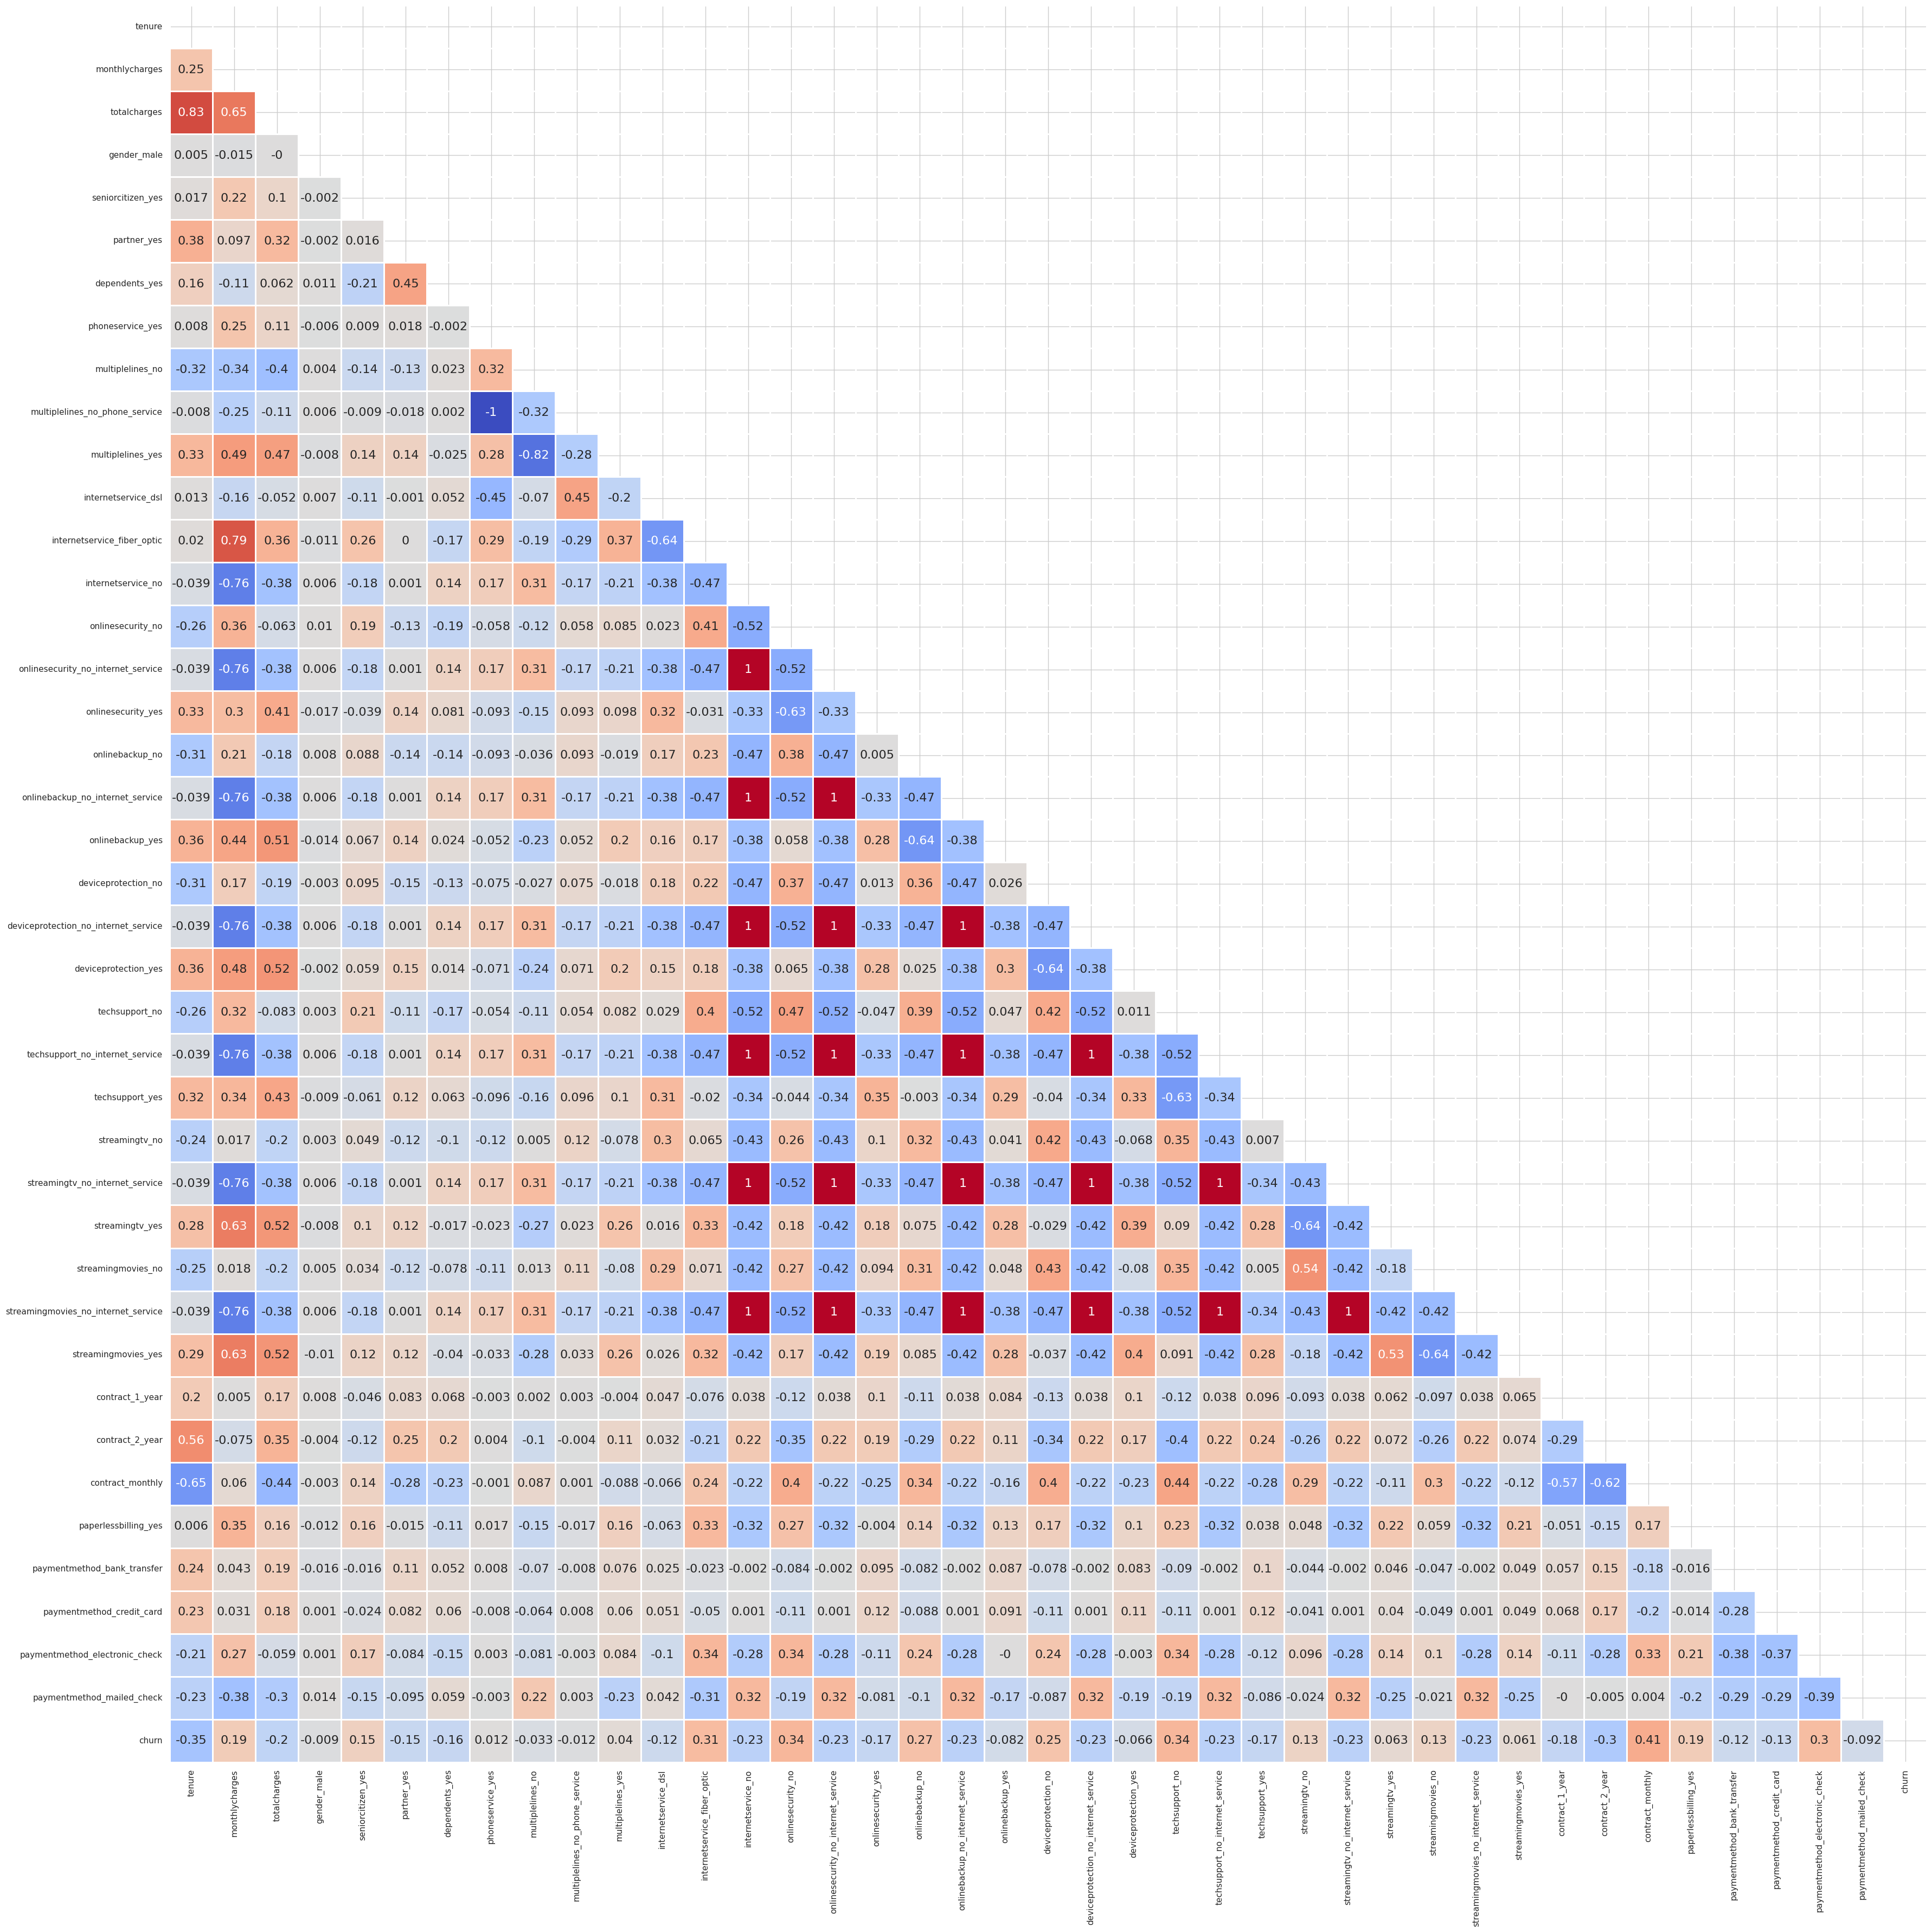

In [73]:
corr_matrix = data_scale.corr().round(3)

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

fig, ax = plt.subplots(figsize=(40,40))
sns.heatmap(corr_matrix, vmin=-1, vmax=1, cbar=False,
            cmap='coolwarm', linewidth=1, mask=mask,
            square=True, annot=True, annot_kws={'fontsize':16}, ax=ax)

plt.show()

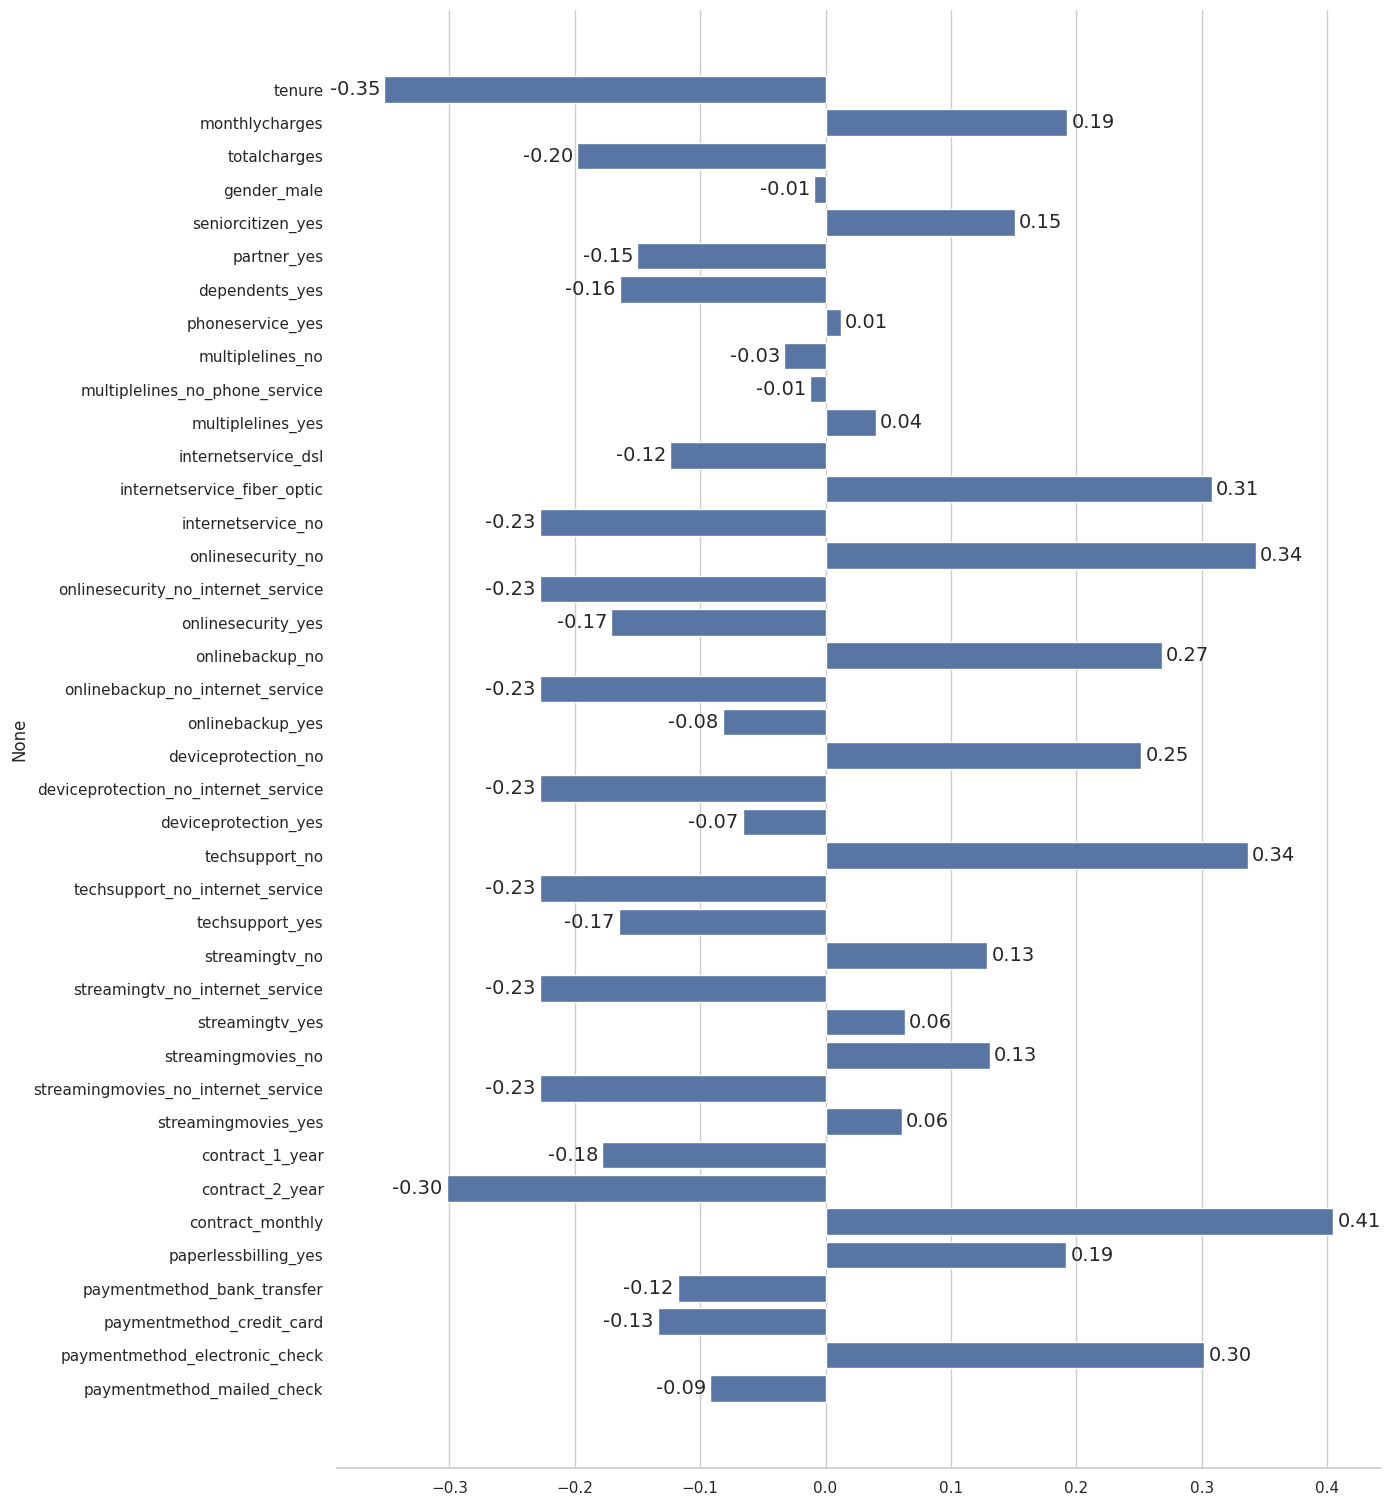

In [74]:
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['churn'].drop('churn')

fig, ax = plt.subplots(figsize=(12,18))

sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.axis('tight')
sns.despine(left=True)
plt.show()

#### Positive Correlations

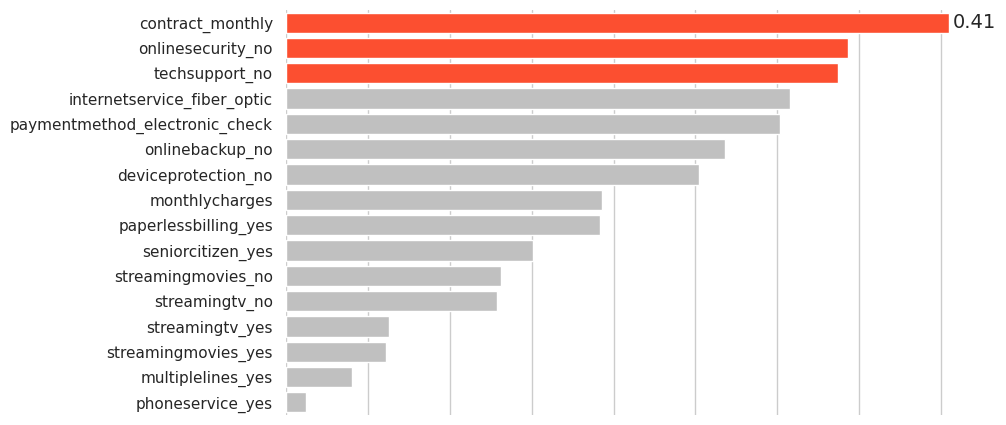

In [75]:
# Calculating correlation and preparing data
corr_matrix = data_scale.corr().round(3)
corr_target = corr_matrix['churn'].drop('churn').sort_values(ascending=False)
corr_positive = corr_target[corr_target >= 0]

# Setting thresholds and plotting
threshold_top = 3
fig, ax = plt.subplots(figsize=(8, 5))

# Loop through the values to plot each as an individual bar with a specific color
for index, value in enumerate(corr_positive):
    color = '#FC4F30' if index < threshold_top else 'silver'
    sns.barplot(x=[value], y=[corr_positive.index[index]], color=color, ax=ax, saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.set_xticklabels([])
sns.despine(left=True, bottom=True)
plt.show()

#### Negative Correllations

<ipython-input-76-5e9d81c04a05>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_negative.values, y=corr_negative.index, ax=ax, palette=palette, saturation=1)


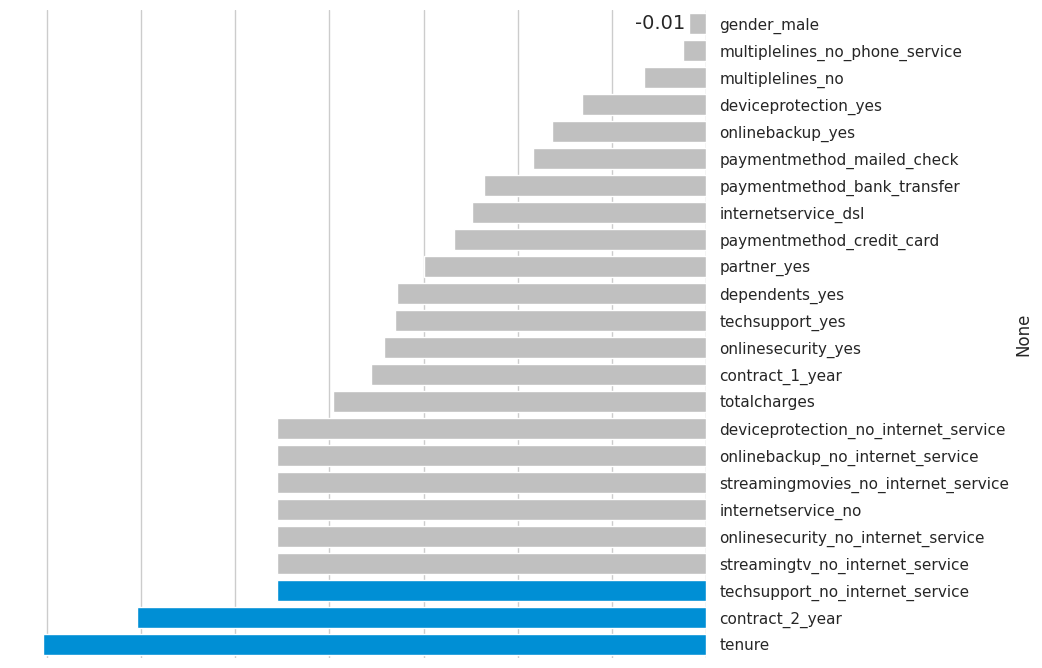

In [76]:
corr_negative = corr_target[corr_target < 0]

threshold_top = 3
threshold_bot = corr_negative.size - threshold_top - 1
palette = []
for i in range(0, len(corr_negative)):
  if i > threshold_bot:
    palette.append('#008FD5') # blue
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(8,8))

sns.barplot(x=corr_negative.values, y=corr_negative.index, ax=ax, palette=palette, saturation=1)

ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

ax.yaxis.set_label_position("right")
ax.yaxis.tick_right()
ax.set_xticklabels([])

sns.despine(left=True, bottom=True)
plt.tick_params(right=False)
plt.show()

In [77]:
threshold = 0.9  # Define high correlation threshold
# Create a boolean mask for the upper triangle of the correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
# Find columns that have any correlation greater than the threshold
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
print("Columns to drop due to high correlation:", to_drop)

Columns to drop due to high correlation: ['onlinesecurity_no_internet_service', 'onlinebackup_no_internet_service', 'deviceprotection_no_internet_service', 'techsupport_no_internet_service', 'streamingtv_no_internet_service', 'streamingmovies_no_internet_service']


In [78]:
# Find index/column names of highly correlated features
to_drop = [column for column in upper.columns if any(upper[column] > threshold)]
df8.drop(columns=to_drop, errors='ignore', inplace=True)

In [79]:
df8.head(4)

gender seniorcitizen partner dependents  tenure phoneservice multiplelines  \
0  Female           Yes     Yes         No       1          Yes            No   
1    Male            No      No         No       1          Yes            No   
2    Male            No     Yes         No       1          Yes            No   
3  Female            No      No         No       1          Yes            No   

  internetservice onlinesecurity onlinebackup deviceprotection techsupport  \
0     Fiber optic             No           No               No          No   
1     Fiber optic             No           No               No          No   
2     Fiber optic             No           No               No          No   
3     Fiber optic             No           No               No          No   

  streamingtv streamingmovies contract paperlessbilling     paymentmethod  \
0          No              No  Monthly              Yes      Mailed check   
1          No              No  Monthly               No      Mailed check   
2          No              No  Monthly               No  Electronic check   
3          No              No  Monthly               No      Mailed check   

   monthlycharges  totalcharges churn  
0           70.45         70.45   yes  
1           70.60         70.60   yes  
2           70.00         70.00   yes  
3           69.55         69.55   yes

### Oversampling with SMOTE
The dataset is imbalanced. So, the SMOTE, one of the oversampling methods, is used to handle it.

In [80]:
# numerical
column_numerical = ['tenure', 'monthlycharges', 'totalcharges']

# categorical
column_categorical = list(data_scale.columns)
column_categorical.remove('tenure')
column_categorical.remove('monthlycharges')
column_categorical.remove('totalcharges')

In [81]:
smote = SMOTE(random_state=1)

X_train_smote, y_train_smote = smote.fit_resample(X_train_scale, y_train_encode)

X_train_smote_df = pd.DataFrame(X_train_smote, columns=X_train_smote.columns)
y_train_smote_df = pd.DataFrame(y_train_smote, columns=['churn'])

data_smote = pd.concat([X_train_smote_df, y_train_smote_df], axis=1)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The SMOTE or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(


In [82]:
data_scale_train['churn'].value_counts()

churn
0    3622
1    1308
Name: count, dtype: int64

In [83]:
data_smote['churn'].value_counts()

churn
0    3622
1    3622
Name: count, dtype: int64

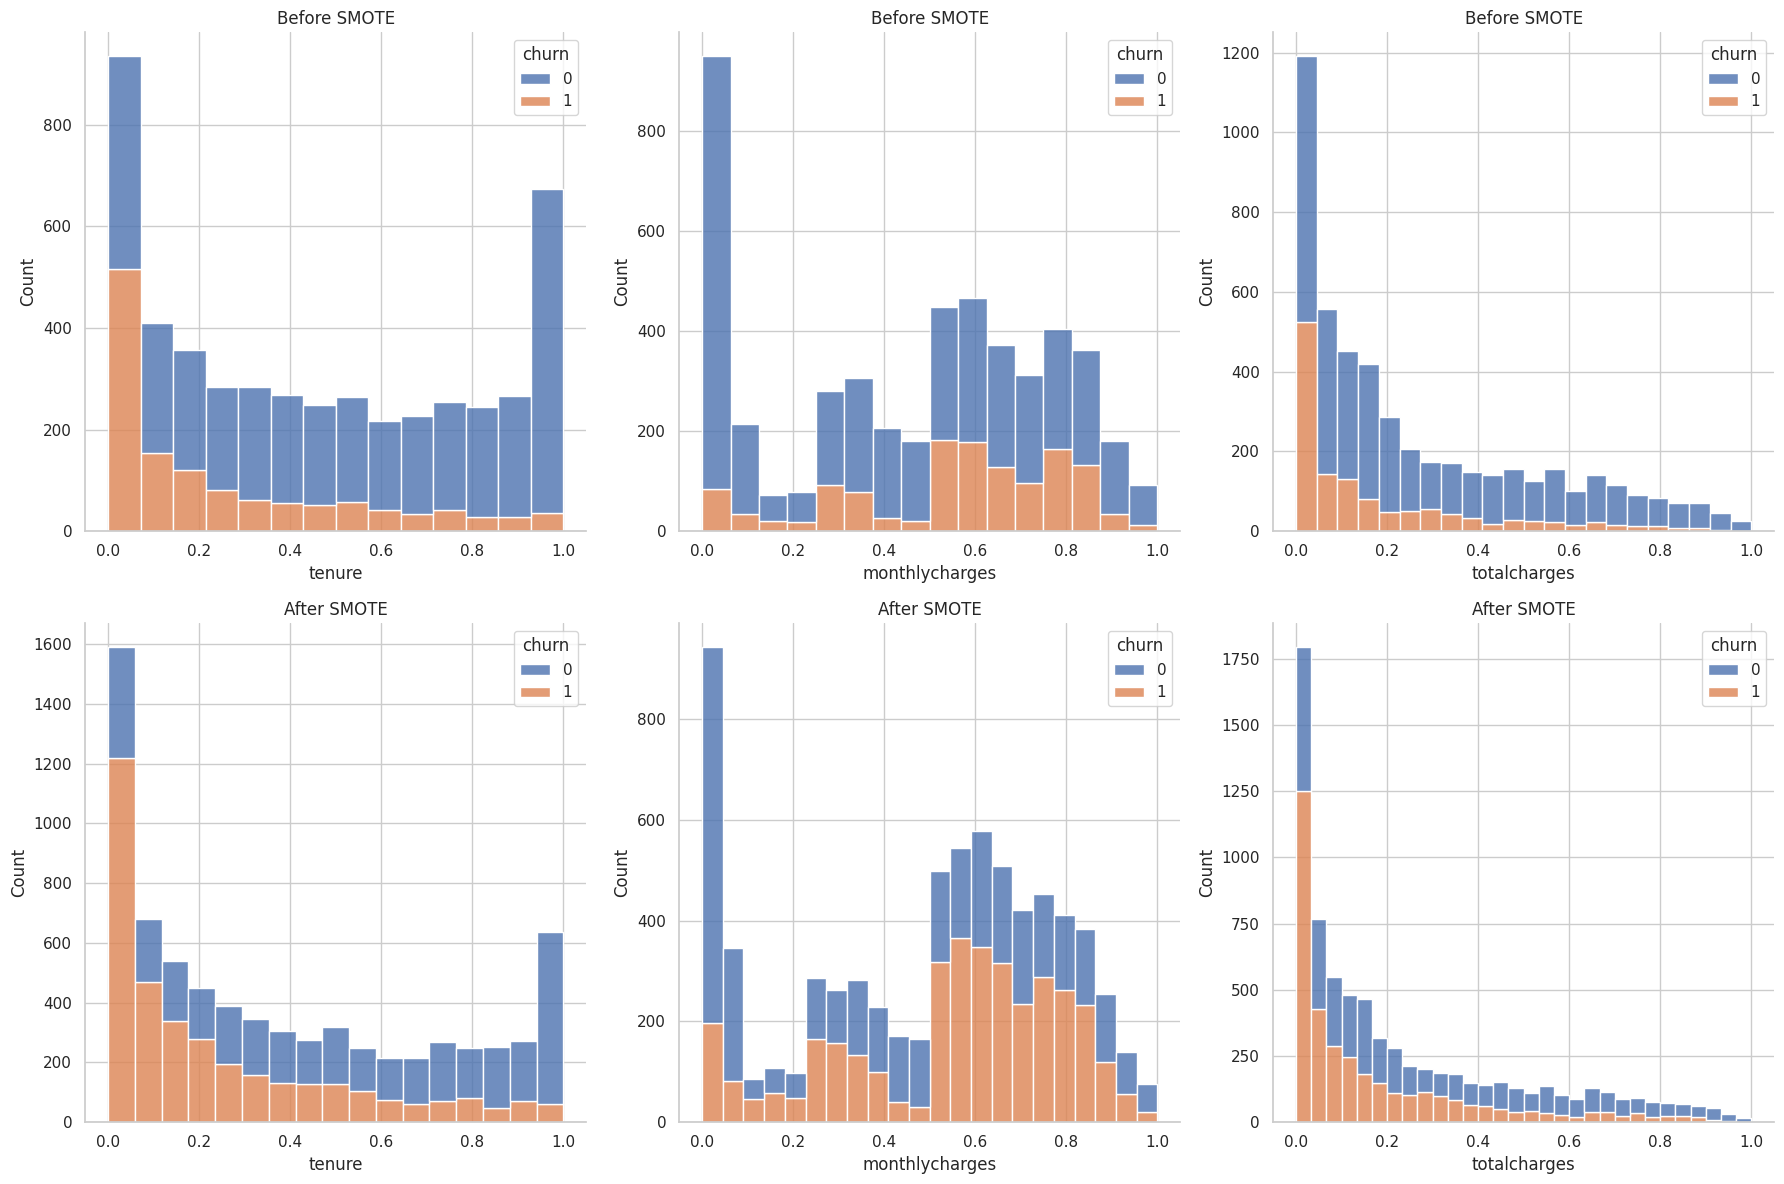

In [84]:
fig, ax = plt.subplots(2, 3, figsize=(18,12))
axes_list = [axes for axes_row in ax for axes in axes_row]

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_scale_train, x=col, hue='churn', hue_order=[0,1], multiple='stack', ax=axes_list[i], alpha=0.8)
  axes_list[i].set_title('Before SMOTE')

for i, col in enumerate(column_numerical):
  sns.histplot(data=data_smote, x=col, hue='churn', hue_order=[0,1], multiple='stack', ax=axes_list[i+3], alpha=0.8)
  axes_list[i+3].set_title('After SMOTE')

plt.tight_layout()
sns.despine()

plt.show()

<ipython-input-85-15e8ada74c59>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['retain' 'churn' 'retain' ... 'retain' 'churn' 'retain']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tmp_df.loc[:,'churn'] = tmp_df.loc[:,'churn'].apply(lambda x: 'churn' if x == 1 else 'retain')


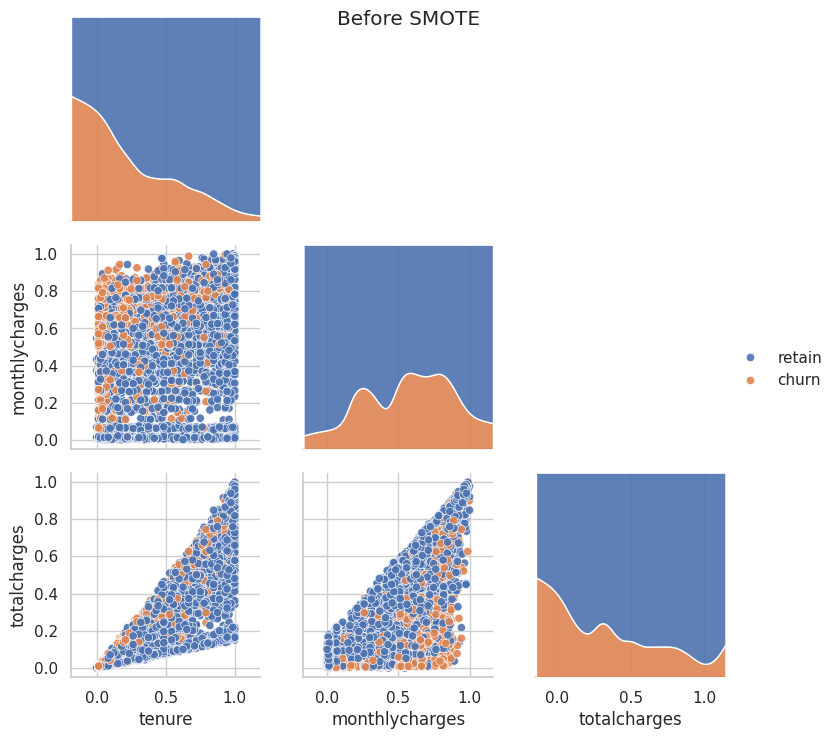

In [85]:
tmp_df = data_scale_train.copy()
tmp_df.loc[:,'churn'] = tmp_df.loc[:,'churn'].apply(lambda x: 'churn' if x == 1 else 'retain')

g = sns.PairGrid(tmp_df, x_vars=column_numerical, y_vars=column_numerical, hue='churn', corner=True)
g.map_lower(sns.scatterplot, alpha=0.9)
g.map_diag(sns.kdeplot, multiple='fill', alpha=0.9)
g.add_legend(title='')

g.fig.suptitle('Before SMOTE')

plt.show()

<ipython-input-86-8464d6351bde>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '['retain' 'churn' 'retain' ... 'churn' 'churn' 'churn']' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  tmp_df.loc[:,'churn'] = tmp_df.loc[:,'churn'].apply(lambda x: 'churn' if x == 1 else 'retain')


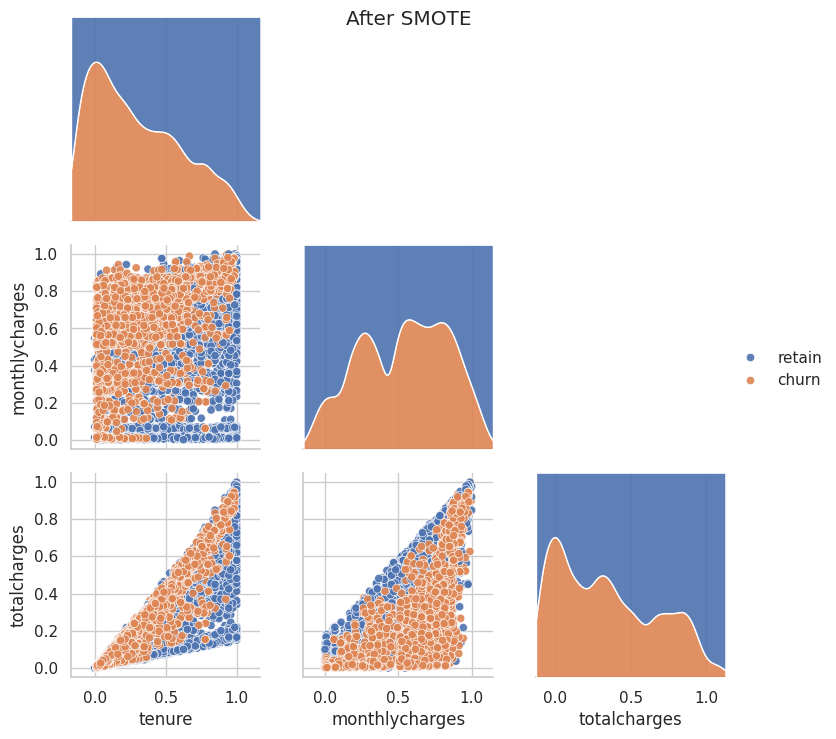

In [86]:
tmp_df = data_smote.copy()
tmp_df.loc[:,'churn'] = tmp_df.loc[:,'churn'].apply(lambda x: 'churn' if x == 1 else 'retain')

g = sns.PairGrid(tmp_df, x_vars=column_numerical, y_vars=column_numerical, hue='churn', corner=True)
g.map_lower(sns.scatterplot, alpha=0.9)
g.map_diag(sns.kdeplot, multiple='fill', alpha=0.9)
g.add_legend(title='')

g.fig.suptitle('After SMOTE')

plt.show()

## Model Development & Evaluation

### Obtaining different scores

In [87]:
def get_score(y_pred_list, y_test, average=None, plot=True, axis=0, cmap='Blues'):
  model_name = []
  accuracy = []
  precision = []
  recall = []
  f1 = []
  roc_auc = []

  for name, y_pred in y_pred_list.items():
    model_name.append(name)
    if average != None:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred, average=average))
      recall.append(recall_score(y_test, y_pred, average=average))
      f1.append(f1_score(y_test, y_pred, average=average))
      roc_auc.append(roc_auc_score(y_test, y_pred, average=average))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        f'{average}_avg_precision':precision,
        f'{average}_avg_recall':recall,
        f'{average}_avg_f1_score':f1,
        'roc_auc':roc_auc
      }
    else:
      accuracy.append(accuracy_score(y_test, y_pred))
      precision.append(precision_score(y_test, y_pred))
      recall.append(recall_score(y_test, y_pred))
      f1.append(f1_score(y_test, y_pred))
      roc_auc.append(roc_auc_score(y_test, y_pred))

      score_list = {
        'model':model_name,
        'accuracy':accuracy,
        'precision':precision,
        'recall':recall,
        'f1_score':f1,
        'roc_auc':roc_auc
      }

  score_df = pd.DataFrame(score_list).set_index('model')

  if plot:
    display(score_df.style.background_gradient(axis=axis, cmap=cmap))

  return score_df

#### Harmonic Mean
Harmonic mean between accuracy and recall

In [88]:
def fbeta_score(accuracy, recall, beta=1):
  fbeta_score = (1 + beta**2) * (accuracy*recall)/(beta*accuracy+recall)

  return fbeta_score

In [89]:
model_list = {
    'Logistic Regression':LogisticRegression(max_iter=1000, random_state=1),
    'Ridge Classifier':RidgeClassifier(random_state=1),
    'KNN':KNeighborsClassifier(),
    'SVC':SVC(random_state=1),
    'Neural Network':MLPClassifier(max_iter=1000, random_state=1),
    'Decision Tree':DecisionTreeClassifier(random_state=1),
    'Random Forest':RandomForestClassifier(random_state=1),
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

In [90]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = get_score(y_pred_list, y_test_model, average='macro')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:35:25] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002805 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3157
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Boosting methods show better performance. So, the boosting methods will be used for the next process.

In [91]:
model_list = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

In [92]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_smote = get_score(y_pred_list, y_test_model, average='macro')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:35:39] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002466 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3157
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


### Feature Selection

#### ANOVA test for feature selection.

In [93]:
threshold = 21

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

print('before filter\t:', X_train_model.shape)
print('after filter\t:', X_train_filter.shape)

before filter	: (7244, 40)
after filter	: (7244, 21)


<ipython-input-94-e9f579fc19e3>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax, palette=palette)


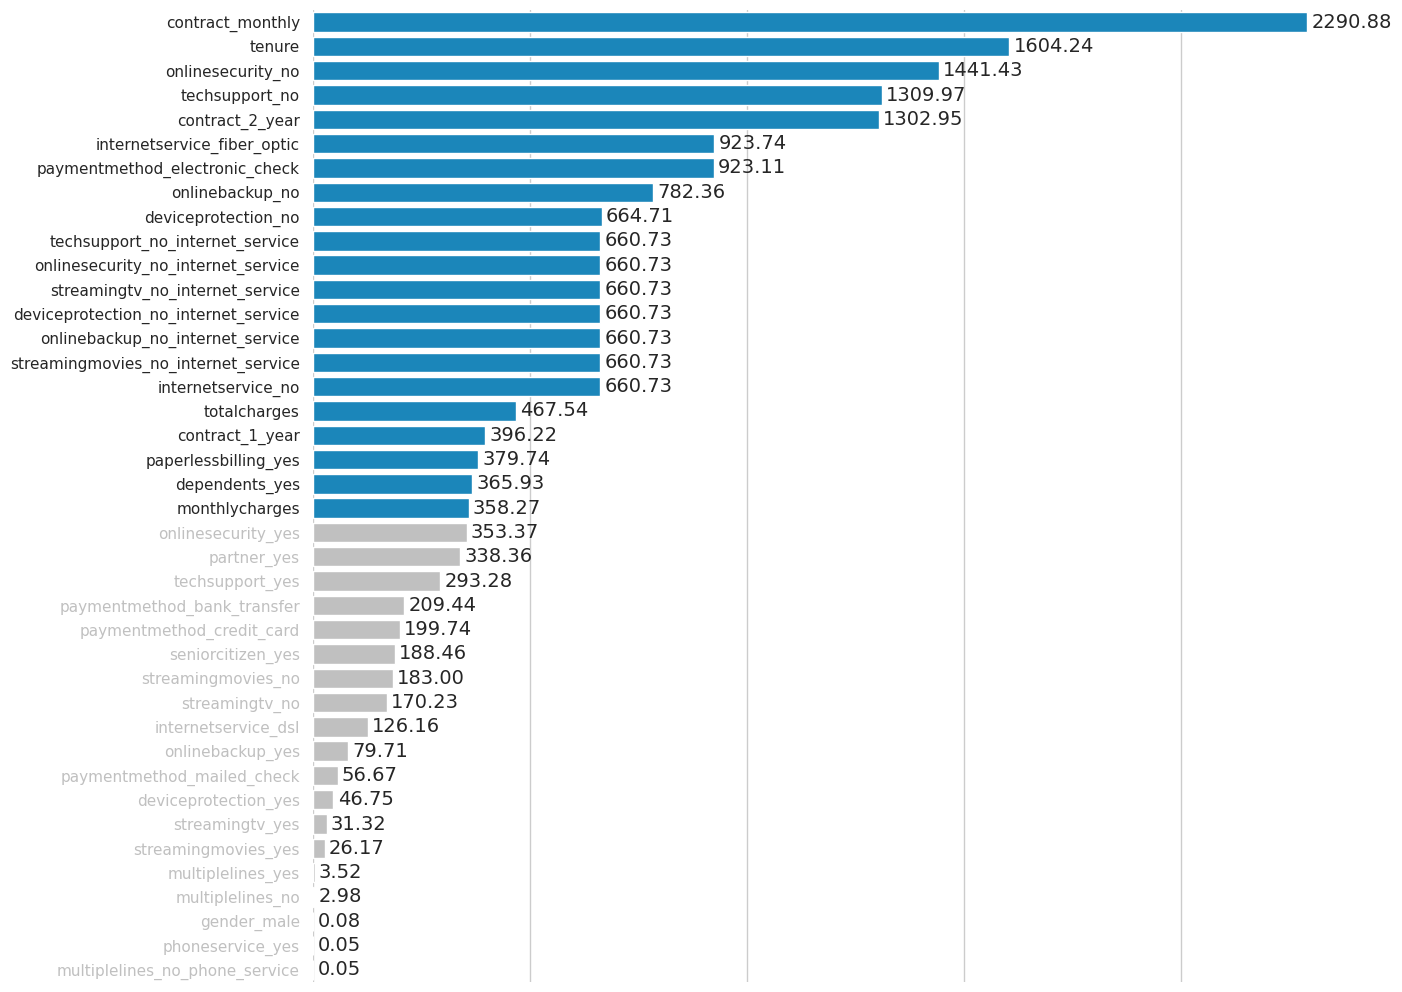

In [94]:
# viz
selected_feature = filter.get_feature_names_out()
feature_name = filter.feature_names_in_
feature_score = filter.scores_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_score':feature_score}).sort_values('feature_score', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
selected = list()
for i in range(0, X_train_model.shape[1]):
  if i < threshold:
    selected.append(True)
  else:
    selected.append(False)

selected_s = pd.Series(selected, name='selected')
feature_selection = pd.concat([feature_selection, selected_s], axis=1)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_score', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'{val:.2f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.show()

In [95]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_filter = get_score(y_pred_list, y_test_model, average='macro')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:35:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001121 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1820
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


#### Wrapper Method
Recursive Feature Elimination (RFE) method using logistic regression as its base estimator.

In [96]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

threshold = 21
estimator = LogisticRegression(random_state=1)

wrapper = RFE(estimator=estimator, n_features_to_select=threshold)
wrapper.fit(X_train_model, y_train_model)

X_train_wrap = wrapper.transform(X_train_model)
X_test_wrap = wrapper.transform(X_test_scale)

print('before wrapper\t:', X_train_model.shape)
print('after wrapper\t:', X_train_wrap.shape)

before wrapper	: (7244, 40)
after wrapper	: (7244, 21)


<ipython-input-97-75f9f70c0953>:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax, palette=palette)


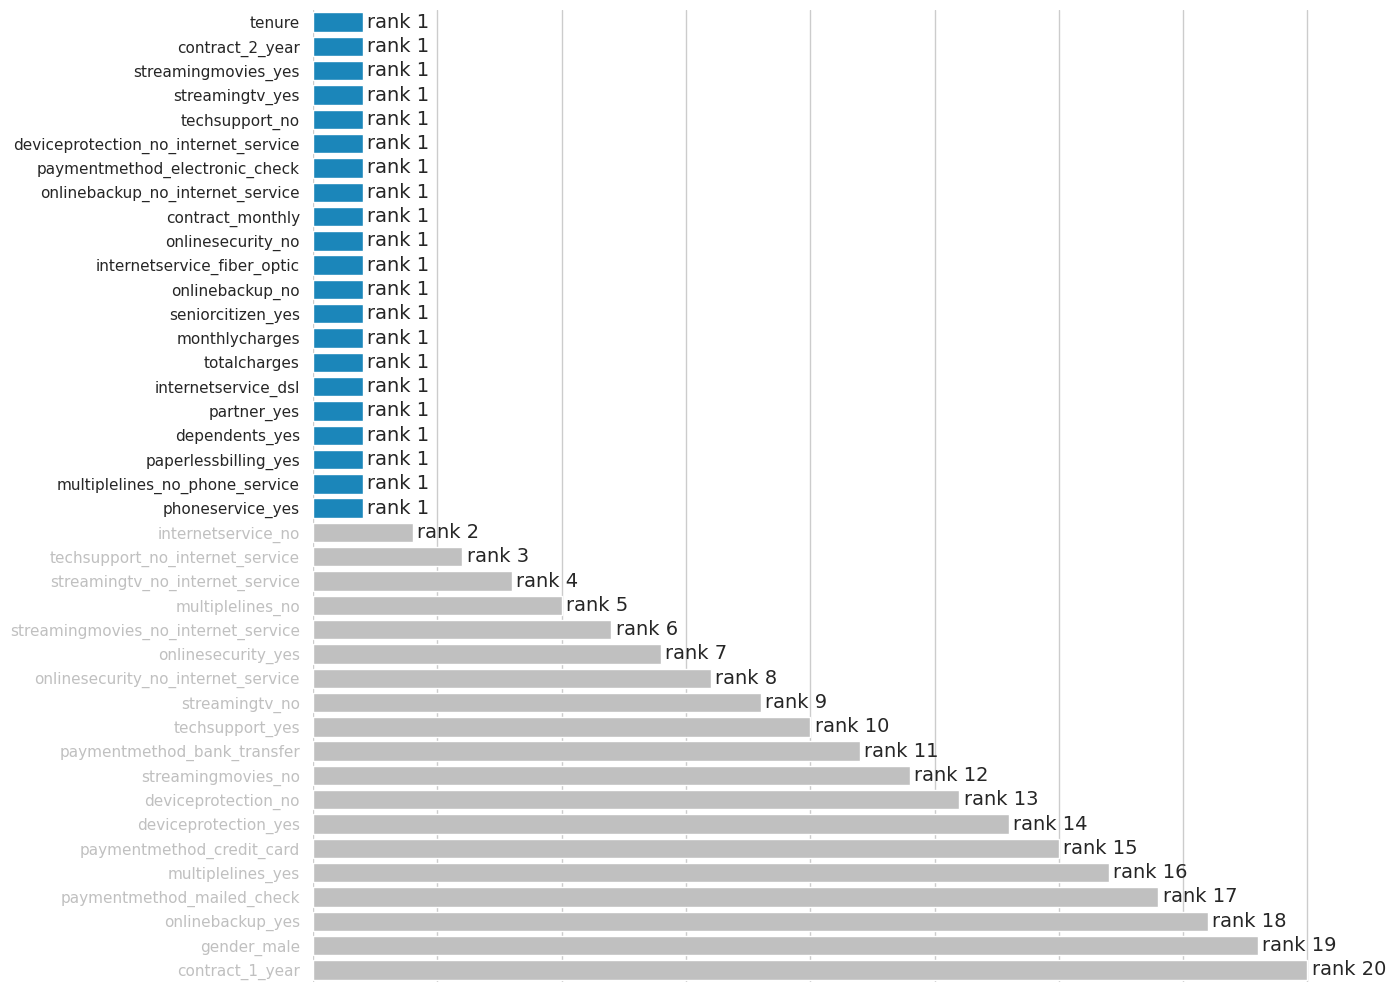

In [97]:
# viz
selected_feature = wrapper.get_feature_names_out()
feature_name = wrapper.feature_names_in_
feature_ranking = wrapper.ranking_

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_ranking':feature_ranking}).sort_values('feature_ranking', ascending=True)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
feature_selection['selected'] = feature_selection['feature_ranking'].apply(lambda x: True if x == 1 else False)

# highlight the top features
palette = []
for i in range(0, len(feature_selection)):
  if i < threshold:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

sns.barplot(data=feature_selection, x='feature_ranking', y='feature_name', ax=ax, palette=palette)
# ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

# custom bar label visibility
for con in ax.containers:
  # labels = [val for val in con.datavalues]
  labels = con.datavalues
  labels_len = len(labels)

  # masking the top features
  np.put(labels, np.arange(threshold,labels_len), [-1])

  # hide the labels for non-top features
  labels = [f'rank {val:.0f}' if val != -1 else '' for val in labels]

  ax.bar_label(con, labels=labels, padding=3, fontsize=14, fontweight='medium')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.show()

In [98]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_wrap, y_train_model)
  y_pred_list[name] = model.predict(X_test_wrap)

score_wrap = get_score(y_pred_list, y_test_model, average='macro')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:36:04] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001441 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2325
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


#### Embedded Method
Will use logistic regression as its base estimator.

In [99]:
# estimator parameter:
# A supervised learning estimator with a fit method
# that provides information about feature importance
# (e.g. coef_, feature_importances_) -> DecisionTree uses feature importance

estimator = LogisticRegression(random_state=1)

embedded = SelectFromModel(estimator=estimator, threshold='median')
embedded.fit(X_train_model, y_train_model)

X_train_embed = embedded.transform(X_train_model)
X_test_embed = embedded.transform(X_test_scale)

print('before embedded\t:', X_train_model.shape)
print('after embedded\t:', X_train_embed.shape)


before embedded	: (7244, 40)
after embedded	: (7244, 20)


threshold: 0.128


<ipython-input-100-99a63c52cb6a>:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax, palette=palette)


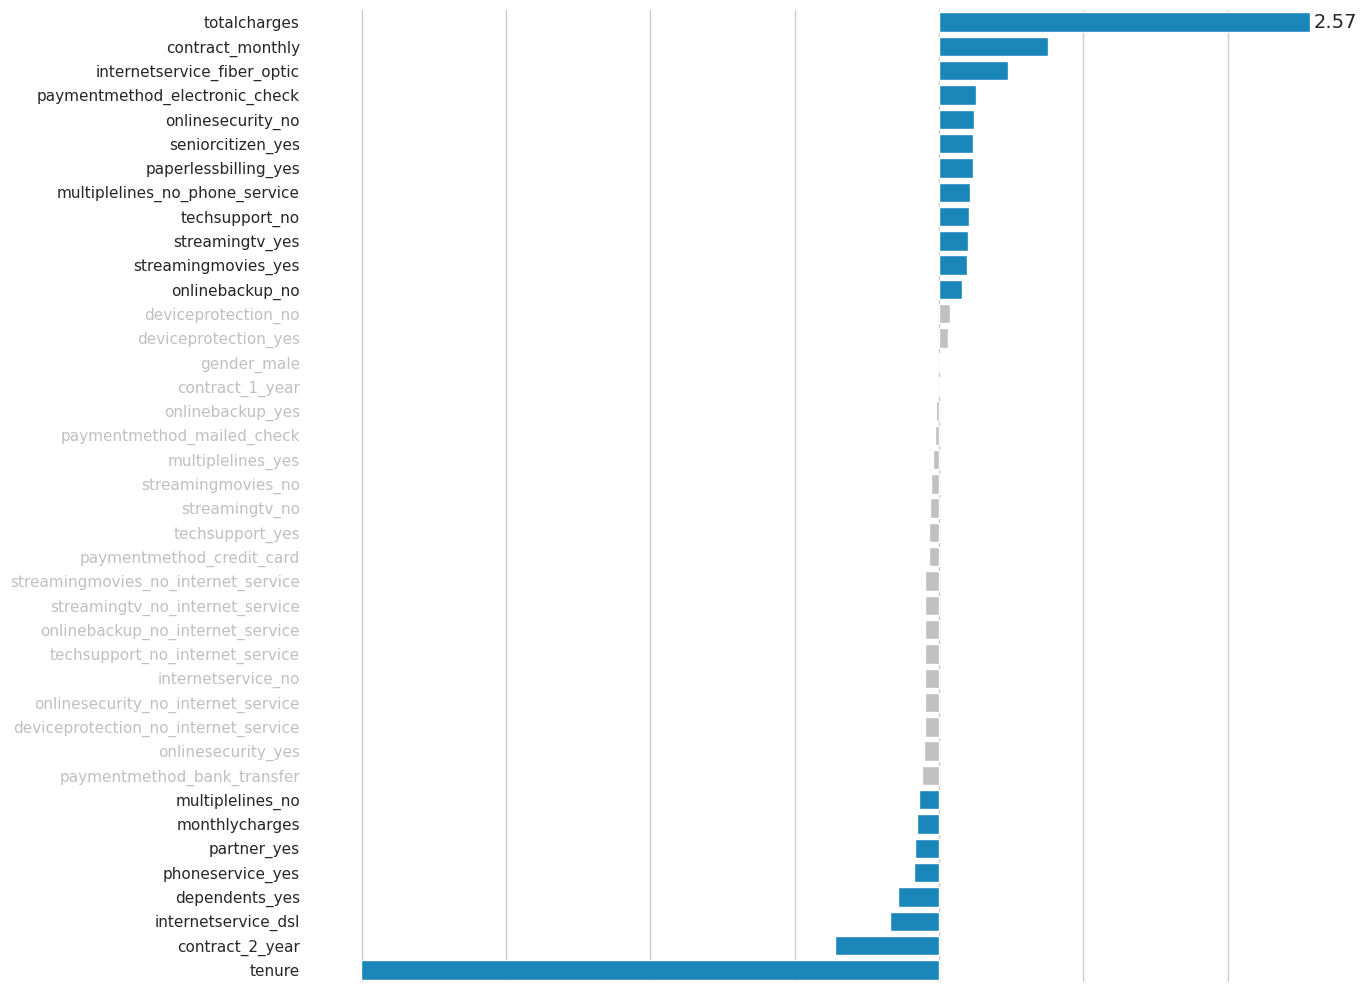

In [100]:
# viz
# selected_feature = embedded.get_feature_names_out()
feature_name = embedded.feature_names_in_
feature_importance = embedded.estimator_.coef_[0]

# add to dataframe
feature_selection = pd.DataFrame({'feature_name':feature_name, 'feature_importance':feature_importance}).sort_values('feature_importance', ascending=False)
feature_selection.reset_index(drop=True, inplace=True)

# create flag
threshold = embedded.threshold_
print(f'threshold: {threshold:.3f}')
feature_selection['selected'] = feature_selection['feature_importance'].apply(lambda x: True if (abs(x) > threshold) else False)

# highlight the top features
palette = []
for flag in feature_selection['selected']:
  if flag:
    palette.append('#008FD5')
  else:
    palette.append('silver')

fig, ax = plt.subplots(figsize=(12,12))

# sns.barplot(x=corr_target.values, y=corr_target.index, ax=ax, palette=palette)
sns.barplot(data=feature_selection, x='feature_importance', y='feature_name', ax=ax, palette=palette)
ax.bar_label(ax.containers[0], padding=3, fmt='%.2f', fontsize=14, fontweight='medium')

# custom y label color
for i, label in enumerate(ax.yaxis.get_ticklabels()):
  if feature_selection.loc[i, 'selected'] == False:
    label.set_color('silver')

ax.set_xticklabels([])
ax.set_xlabel('')
ax.set_ylabel('')

sns.despine(left=True, bottom=True)
plt.show()

In [101]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_embed, y_train_model)
  y_pred_list[name] = model.predict(X_test_embed)

score_embed = get_score(y_pred_list, y_test_model, average='macro')

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:36:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001386 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2354
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 20
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


#### Comparison
Model performance comparison before and after feature selection. We will keep the average of each metrics.

In [102]:
score_smote_mean = pd.DataFrame(score_smote.mean(), columns=['original']).T
score_filter_mean = pd.DataFrame(score_filter.mean(), columns=['filter method']).T
score_wrap_mean = pd.DataFrame(score_wrap.mean(), columns=['wrapper method']).T
score_embed_mean = pd.DataFrame(score_embed.mean(), columns=['embedded method']).T

score_compare = pd.concat([score_smote_mean,
                           score_filter_mean,
                           score_wrap_mean,
                           score_embed_mean], axis=0)

score_compare.style.background_gradient(axis=0)

As visible above, the original feature aka without feature selection have the highest accuracy. But, it has the lowest recall score.

The filter method may give the best performances.

In the next step, hyperparameter tuning, we will keep original feature and feature after feature selection using filter method.

### Hyperparameter Tuning

In [103]:
model_list = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1),
    'AdaBoost Classifier':AdaBoostClassifier(random_state=1),
    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False),
    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss'),
    'LightGBM':LGBMClassifier(random_state=1),
}

In [104]:
model_list_tuned = {
    'Gradient Boosting Classifier':GradientBoostingClassifier(random_state=1,
                                                              max_depth=2,
                                                              n_estimators=500,
                                                              learning_rate=0.02),

    'AdaBoost Classifier':AdaBoostClassifier(

                                            random_state=1,
                                            n_estimators=80,
                                            learning_rate=0.04
                                          ),

    'CatBoost Classifier':CatBoostClassifier(random_state=1, verbose=False,
                                             n_estimators=1000,
                                             learning_rate=0.4,
                                             scale_pos_weight=1.1),

    'Hist Gradient Boosting':HistGradientBoostingClassifier(random_state=1,
                                                            max_iter=200,
                                                            learning_rate=0.01,
                                                            max_depth=5),
    'XGBoost':XGBClassifier(random_state=1, use_label_encoder=False, eval_metric='logloss',
                            colsample_bytree=0.1,
                            learning_rate=0.005),

    'LightGBM':LGBMClassifier(random_state=1,
                              num_leaves=10,
                              n_estimators=175,
                              learning_rate=0.01)
}

#### Without Feature Selection
Before Tuning:

In [105]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_no_fs_not_tuned = get_score(y_pred_list, y_test_model)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:36:31] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002490 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3157
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


After Tuning:

In [106]:
y_pred_list = dict()

for name, model in model_list_tuned.items():
  model.fit(X_train_model, y_train_model)
  y_pred_list[name] = model.predict(X_test_model)

score_no_fs_tuned = get_score(y_pred_list, y_test_model)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:36:52] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002478 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3157
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 40
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


Comparison of the scores

In [107]:
score_compare_accuracy = score_no_fs_not_tuned.loc[:, ['accuracy']]

score_compare_accuracy = score_compare_accuracy.join(score_no_fs_tuned.loc[:, ['accuracy']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_accuracy.style.background_gradient(axis=1)

After tuning, the accuracy score is mostly decreased.

In [108]:
score_compare_recall = score_no_fs_not_tuned.loc[:, ['recall']]

score_compare_recall = score_compare_recall.join(score_no_fs_tuned.loc[:, ['recall']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_recall.style.background_gradient(axis=1)

However, the recall score has increased dramatically. Therefore, we will use the tuned model for model selection.

#### With Feature Selection




Before Tuning


In [109]:
y_pred_list = dict()

for name, model in model_list.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_fs_not_tuned = get_score(y_pred_list, y_test_model)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:37:03] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001141 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1820
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000



After Tunning

In [110]:
y_pred_list = dict()

for name, model in model_list_tuned.items():
  model.fit(X_train_filter, y_train_model)
  y_pred_list[name] = model.predict(X_test_filter)

score_fs_tuned = get_score(y_pred_list, y_test_model)

/usr/local/lib/python3.10/dist-packages/xgboost/core.py:158: UserWarning: [14:37:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(


[LightGBM] [Info] Number of positive: 3622, number of negative: 3622
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001161 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1820
[LightGBM] [Info] Number of data points in the train set: 7244, number of used features: 21
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000


/usr/local/lib/python3.10/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(




**Comparison**

In [111]:
score_compare_accuracy = score_fs_not_tuned.loc[:, ['accuracy']]

score_compare_accuracy = score_compare_accuracy.join(score_fs_tuned.loc[:, ['accuracy']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_accuracy.style.background_gradient(axis=1)

After tuning, the accuracy score is mostly decreased.



In [112]:
score_compare_recall = score_fs_not_tuned.loc[:, ['recall']]

score_compare_recall = score_compare_recall.join(score_fs_tuned.loc[:, ['recall']],
                                   lsuffix='_not_tuned', rsuffix='_tuned')

score_compare_recall.style.background_gradient(axis=1)

However, the recall score has increased dramatically. Therefore, we use the tuned model for model selection.

## Model Selection

We use the F-beta score to calculate the harmonic mean of accuracy and recall.

![Model Selection](image.png)

### Without Feature Selection

In [113]:
accuracy = score_no_fs_tuned['accuracy']
recall = score_no_fs_tuned['recall']

score_no_fs_tuned['fbeta'] = fbeta_score(accuracy, recall, beta=1)

score_no_fs_tuned.loc[:, ['accuracy', 'recall', 'fbeta']].style.background_gradient(axis=0)

Among the models evaluated, the Gradient Boosting Classifier has the highest accuracy but a lower recall, which might lead to missing critical positive cases. In contrast, the AdaBoost Classifier excels in recall but has lower accuracy, making it less suitable for applications requiring balanced performance.

For scenarios demanding both high accuracy and substantial recall, XGBoost emerges as the optimal choice. It demonstrates a balanced mix with an accuracy of 0.761477, a recall of 0.778966, and an F-beta score of 0.770122. This combination ensures that XGBoost not only predicts accurately but also effectively identifies positive instances, making it ideal for diverse applications where precision and comprehensive detection are crucial.

Therefore, XGBoost is selected as the model that uses all features (without feature selection), thanks to its overall balanced performance across critical metrics. This choice is ideal for ensuring reliable predictions and minimizing the risk of missing important detections.

### With Feature Selection

In [114]:
accuracy = score_fs_tuned['accuracy']
recall = score_fs_tuned['recall']

score_fs_tuned['fbeta'] = fbeta_score(accuracy, recall, beta=1)

score_fs_tuned.loc[:, ['accuracy', 'recall', 'fbeta']].style.background_gradient(axis=0)

The Gradient Boosting Classifier offers high accuracy but lower recall, making it less effective in identifying all positive instances. On the other hand, the XGBoost Classifier not only provides balanced accuracy and recall scores but also excels with the highest F-beta score, indicating superior balance between precision and recall.

Given its performance, XGBoost is the preferred choice when using feature selection. It demonstrates a well-rounded performance across crucial metrics, especially in maintaining a balance between detecting true positives and overall prediction accuracy.

The XGBoost model with feature selection achieves a higher recall, meaning it is better at catching potential churn cases. Although this may slightly compromise on accuracy (where the model without feature selection scores higher), the higher recall is more aligned with our objective of not losing any customers.

## Explainable AI

In [115]:
X_train_model = X_train_smote.copy()
y_train_model = y_train_smote.copy()

X_test_model = X_test_scale.copy()
y_test_model = y_test_encode.copy()

threshold = 21

filter = SelectKBest(score_func=f_classif, k=threshold)
filter.fit(X_train_model, y_train_model)

X_train_filter = filter.transform(X_train_model)
X_test_filter = filter.transform(X_test_model)

# selected feature
selected_feature = filter.get_feature_names_out()

# create selected feature dataframe
X_train_filter_dict = dict()
X_test_filter_dict = dict()

for i, feature in enumerate(selected_feature):
  X_train_filter_dict[feature] = X_train_filter[:,i]
  X_test_filter_dict[feature] = X_test_filter[:,i]

X_train_filter = pd.DataFrame(X_train_filter_dict)
X_test_filter = pd.DataFrame(X_test_filter_dict)

In [116]:
X_train_filter.head(4)

tenure  monthlycharges  totalcharges  dependents_yes  \
0   0.653           0.683         0.477             0.0   
1   0.542           0.860         0.476             0.0   
2   0.014           0.360         0.006             0.0   
3   0.111           0.816         0.096             0.0   

   internetservice_fiber_optic  internetservice_no  onlinesecurity_no  \
0                          0.0                 0.0                0.0   
1                          1.0                 0.0                0.0   
2                          0.0                 0.0                1.0   
3                          1.0                 0.0                0.0   

   onlinesecurity_no_internet_service  onlinebackup_no  \
0                                 0.0              0.0   
1                                 0.0              1.0   
2                                 0.0              1.0   
3                                 0.0              1.0   

   onlinebackup_no_internet_service  ...  \
0                               0.0  ...   
1                               0.0  ...   
2                               0.0  ...   
3                               0.0  ...   

   deviceprotection_no_internet_service  techsupport_no  \
0                                   0.0             0.0   
1                                   0.0             0.0   
2                                   0.0             1.0   
3                                   0.0             0.0   

   techsupport_no_internet_service  streamingtv_no_internet_service  \
0                              0.0                              0.0   
1                              0.0                              0.0   
2                              0.0                              0.0   
3                              0.0                              0.0   

   streamingmovies_no_internet_service  contract_1_year  contract_2_year  \
0                                  0.0              1.0              0.0   
1                                  0.0              1.0              0.0   
2                                  0.0              0.0              0.0   
3                                  0.0              0.0              0.0   

   contract_monthly  paperlessbilling_yes  paymentmethod_electronic_check  
0               0.0                   1.0                             0.0  
1               0.0                   1.0                             0.0  
2               1.0                   1.0                             1.0  
3               1.0                   0.0                             0.0  

[4 rows x 21 columns]

In [134]:
X_train_filter.columns

Index(['tenure', 'monthlycharges', 'totalcharges', 'dependents_yes',
       'internetservice_fiber_optic', 'internetservice_no',
       'onlinesecurity_no', 'onlinesecurity_no_internet_service',
       'onlinebackup_no', 'onlinebackup_no_internet_service',
       'deviceprotection_no', 'deviceprotection_no_internet_service',
       'techsupport_no', 'techsupport_no_internet_service',
       'streamingtv_no_internet_service',
       'streamingmovies_no_internet_service', 'contract_1_year',
       'contract_2_year', 'contract_monthly', 'paperlessbilling_yes',
       'paymentmethod_electronic_check'],
      dtype='object')

In [137]:
model = XGBClassifier(random_state=1, eval_metric='logloss',
                            colsample_bytree=0.1,
                            learning_rate=0.005)
model.fit(X_train_filter, y_train_model)

y_pred = model.predict(X_test_filter)

print(classification_report(y_test_model, y_pred, digits=3))

              precision    recall  f1-score   support

           0      0.914     0.711     0.800      1552
           1      0.505     0.815     0.623       561

    accuracy                          0.739      2113
   macro avg      0.709     0.763     0.712      2113
weighted avg      0.805     0.739     0.753      2113



In [138]:
y_test_model[0]

0

In [139]:
y_pred[0]

1

In [154]:
pip show xgboost

Name: xgboost
Version: 2.1.3
Summary: XGBoost Python Package
Home-page: 
Author: 
Author-email: Hyunsu Cho <chohyu01@cs.washington.edu>, Jiaming Yuan <jm.yuan@outlook.com>
License: Apache-2.0
Location: /usr/local/lib/python3.10/dist-packages
Requires: numpy, nvidia-nccl-cu12, scipy
Required-by: 


## SHAP Explainer
SHAP (SHapley Additive exPlanations) is a game theoretic approach to explain the output of any machine learning model.

### Single and Multiple inputs

In [140]:
input_test = pd.DataFrame(X_test_filter.iloc[1]).T
input_test

tenure  monthlycharges  totalcharges  dependents_yes  \
1   0.139           0.535         0.091             0.0   

   internetservice_fiber_optic  internetservice_no  onlinesecurity_no  \
1                          0.0                 0.0                1.0   

   onlinesecurity_no_internet_service  onlinebackup_no  \
1                                 0.0              1.0   

   onlinebackup_no_internet_service  ...  \
1                               0.0  ...   

   deviceprotection_no_internet_service  techsupport_no  \
1                                   0.0             1.0   

   techsupport_no_internet_service  streamingtv_no_internet_service  \
1                              0.0                              0.0   

   streamingmovies_no_internet_service  contract_1_year  contract_2_year  \
1                                  0.0              0.0              0.0   

   contract_monthly  paperlessbilling_yes  paymentmethod_electronic_check  
1               1.0                   1.0                             0.0  

[1 rows x 21 columns]

In [141]:
explainer = shap.Explainer(model)
shap_values_single = explainer(input_test)

expected_value = explainer.expected_value

print(f'Excpected value: {expected_value}')

Excpected value: -3.4951066481880844e-05


In [142]:
shap_values_single

.values =
array([[ 0.02195241,  0.02858196,  0.01416828,  0.00864987, -0.01258417,
         0.00680213,  0.0279    ,  0.01087593,  0.02537106,  0.00588306,
         0.00926673,  0.00516291,  0.02193337,  0.00336784,  0.00281784,
         0.00629812,  0.0097131 ,  0.01461039,  0.02810814,  0.00791298,
        -0.0220294 ]], dtype=float32)

.base_values =
array([-3.4951066e-05], dtype=float32)

.data =
array([[0.13888889, 0.53476738, 0.09145288, 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ,
        0.        ]])

In [143]:
shap_values_single[:,:-1]

.values =
array([[ 0.02195241,  0.02858196,  0.01416828,  0.00864987, -0.01258417,
         0.00680213,  0.0279    ,  0.01087593,  0.02537106,  0.00588306,
         0.00926673,  0.00516291,  0.02193337,  0.00336784,  0.00281784,
         0.00629812,  0.0097131 ,  0.01461039,  0.02810814,  0.00791298]],
      dtype=float32)

.base_values =
array([-3.4951066e-05], dtype=float32)

.data =
array([[0.13888889, 0.53476738, 0.09145288, 0.        , 0.        ,
        0.        , 1.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.        ]])

In [144]:
shap_values_multiple = explainer(X_test_filter)
expected_value = explainer.expected_value

print(f'Excpected value: {expected_value}')

Excpected value: -3.4951066481880844e-05


In [145]:
shap_values_multiple[:2]

.values =
array([[ 0.01928116, -0.01838025, -0.00954053,  0.00751108, -0.0116396 ,
         0.00680213, -0.0463264 ,  0.01100516,  0.02213583,  0.00568609,
         0.00855765,  0.00516291,  0.02191462,  0.00336784,  0.00281784,
         0.00594653,  0.0097421 ,  0.01420941,  0.02689866,  0.00785343,
        -0.0208842 ],
       [ 0.02195241,  0.02858196,  0.01416828,  0.00864987, -0.01258417,
         0.00680213,  0.0279    ,  0.01087593,  0.02537106,  0.00588306,
         0.00926673,  0.00516291,  0.02193337,  0.00336784,  0.00281784,
         0.00629812,  0.0097131 ,  0.01461039,  0.02810814,  0.00791298,
        -0.0220294 ]], dtype=float32)

.base_values =
array([-3.4951066e-05, -3.4951066e-05], dtype=float32)

.data =
array([[0.13888889, 0.35817909, 0.06542465, 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 0.        ,
        1.        , 0.        , 1.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 1.        , 1.    

### Plotting as Bar

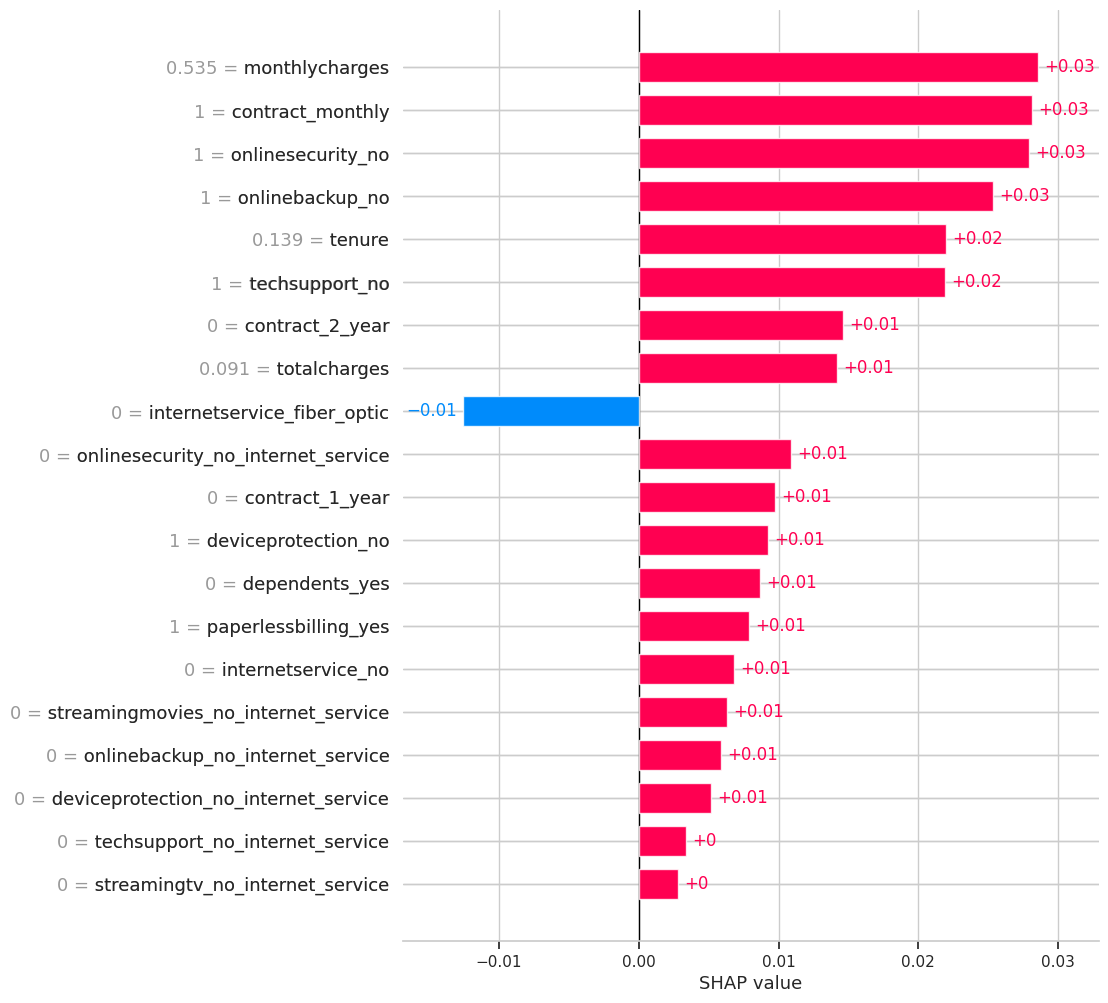

In [146]:
shap.plots.bar(shap_values_single[:,:-1][0], max_display=20)

### Plotting as Beeswarm Summary

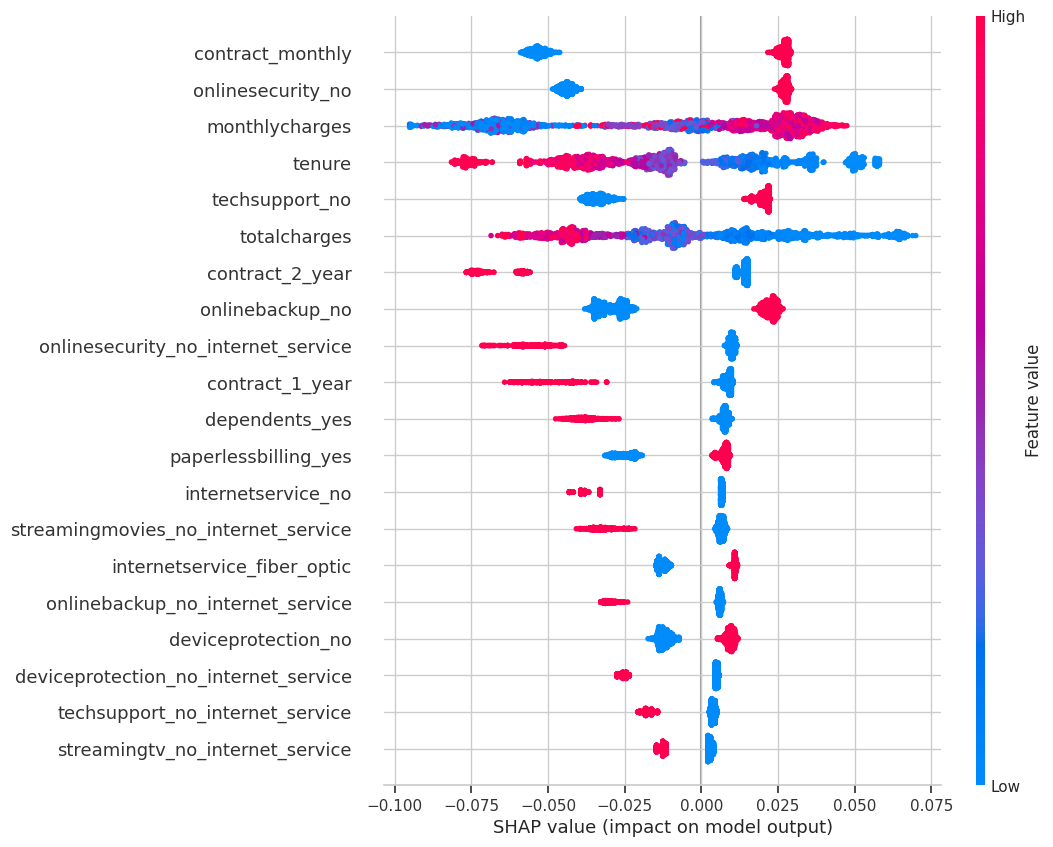

In [147]:
shap.plots.beeswarm(shap_values_multiple[:,:-1], max_display=20)

### Plotting as Waterfall plot

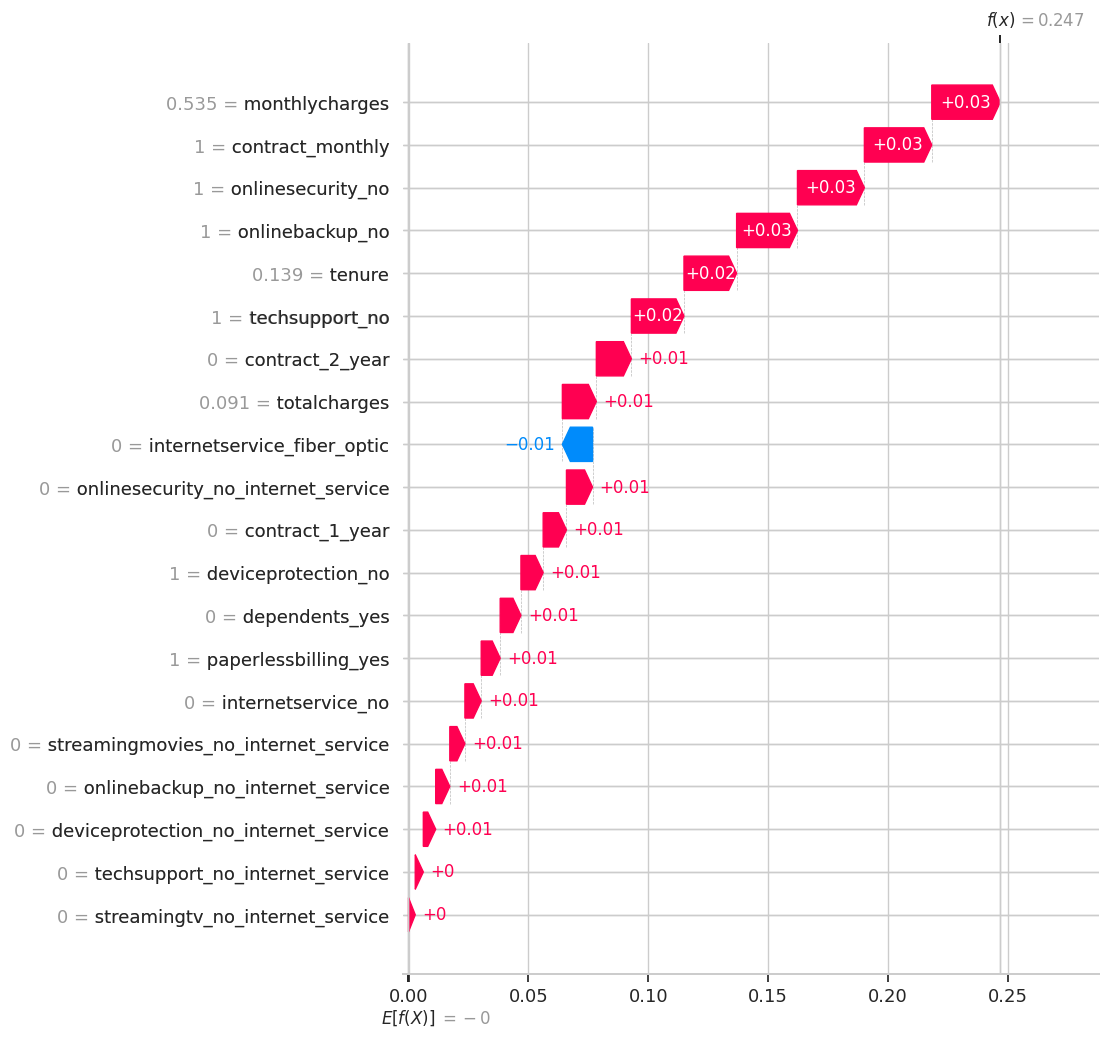

In [148]:
shap.plots.waterfall(shap_values_single[:,:-1][0], max_display=20)

In [149]:
print("Expected Value:", expected_value)
print("Type of Expected Value:", type(expected_value))


Expected Value: -3.4951066e-05
Type of Expected Value: <class 'numpy.float32'>


In [155]:
filename = 'model.pkl'

pickle.dump(model, open(filename, 'wb'))
# Download the file
files.download(filename)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [151]:
import sklearn

print("pandas version:", pd.__version__)
print("scikit-learn version:", sklearn.__version__)
print("numpy version:", np.__version__)

pandas version: 2.2.2
scikit-learn version: 1.6.0
numpy version: 1.26.4
